# Intro


This notebook will be organized as follows 
* [1.How did the covid crisis impact people's lifestyle, mobility and localization ?](#1.-How-did-the-covid-crisis-impact-people's-lifestyle,-mobility-and-localization-?)
    * [1.1 Data preprocessing](#1.1-Data-preprocessing)
    * [1.2 Data analysis](#1.2Data-analysis)
* [2. Is the mobility evolution correlated with a higher number of overall Wikipedia searches?](#2.-Is-the-mobility-evolution-correlated-with-a-higher-number-of-overall-Wikipedia-searches?)
    * [2.1 Data preprocessing](#2.1-Data-preprocessing)
    * [2.2 Data analysis](#2.2-Data-analysis)
* [3.Globally, did interest in ecology change during the covid pandemic?](#3.-Globally,-did-interest-in-ecology-change-during-the-covid-pandemic?)
    * [3.1 Data preprocessing](#3.1-Data-preprocessing)
    * [3.2 Data analysis](#3.2-Data-analysis)
* [4.How did the severity of lockdown in a country have an impact on the disinterest toward ecological topics? (Does a more severe lockdown increases the observed trends?](#4.-How-did-the-severity-of-lockdown-in-a-country-have-an-impact-on-the-disinterest-toward-ecological-topics?-(Does-a-more-severe-lockdown-increases-the-observed-trends?))
    * [4.1 Data preprocessing](#4.1-Data-preprocessing)
    * [4.2 Data analysis](#4.2-Data-analysis)
* [5. Which subjects within the theme of climate change gained or lost popularity during the lockdown period?](#5.-Which-subjects-within-the-theme-of-climate-change-gained-or-lost-popularity-during-the-lockdown-period?)
    * [5.1 Data preprocessing](#5.1-Data-preprocessing)
    * [5.2 Data analysis](#5.2-Data-analysis)

## Setup and libraries

In [1]:
#Libraries

import pandas as pd
%matplotlib inline
import math
import seaborn as sns
import warnings
import numpy as np

import os
import gzip
import json
import pickle
import datetime
import pandas as pd

import pycountry_convert as pc
import pycountry

from pytrends.request import TrendReq

import xlrd as xlrd

from statsmodels.stats import diagnostic
from scipy import stats

from matplotlib import pyplot as plt

import circlify

from helpers.helper_func import *

from dateutil.relativedelta import relativedelta
import datetime

import matplotlib.dates as mdates
from matplotlib.lines import Line2D

In [2]:
#Files paths

DATA_FOLDER = 'data/'

INTERVENTION_DATASET = DATA_FOLDER+"interventions.csv"
GLOBAL_MOBILITY = DATA_FOLDER+"Global_Mobility_Report.csv.gz"
TIME_SERIE_DATASET = DATA_FOLDER+"aggregated_timeseries.json.gz"
APPLE_MOBILITY = DATA_FOLDER+"applemobilitytrends-2020-04-20.csv.gz"
TOPICS_DATASET=DATA_FOLDER+"topics_linked.csv.xz"
COVID_CASES_GZ = DATA_FOLDER + "added_data/owid-covid-data.csv.gz"
AIR_QUALITY = DATA_FOLDER + "added_data/airquality_data_2020_concat.csv.gz"
DEGROWTH_WORLD_TREND = DATA_FOLDER + "added_data/DegrowthWorldTrend.csv"
ECOLOGY_WOLRD_TREND = DATA_FOLDER + "added_data/EcologyWorldTrend.csv"

CLIMATE_CHANGE_WIKI_EN = DATA_FOLDER +'added_data/massviews-20180101-20220101_en.csv'
CLIMATE_CHANGE_WIKI_DE = DATA_FOLDER +'added_data/massviews-20180101-20220101_de.csv'
CLIMATE_CHANGE_WIKI_FR = DATA_FOLDER + 'added_data/massviews-20180101-20220101_fr.csv'
CLIMATE_CHANGE_WIKI_IT = DATA_FOLDER + 'added_data/massviews-20180101-20220101_it.csv'
CLIMATE_CHANGE_WIKI_NO = DATA_FOLDER + 'added_data/massviews-20180101-20220101_no.csv'
CLIMATE_CHANGE_WIKI_DA = DATA_FOLDER + 'added_data/massviews-20180101-20220101_da.csv'
CLIMATE_CHANGE_WIKI_NL = DATA_FOLDER + 'added_data/massviews-20180101-20220101_nl.csv'
CLIMATE_CHANGE_WIKI_SR = DATA_FOLDER + 'added_data/massviews-20180101-20220101_sr.csv'
CLIMATE_CHANGE_WIKI_SW = DATA_FOLDER + 'added_data/massviews-20180101-20220101_sw.csv'


In [3]:
#General helpers for countries correspondance
country = ['France','Germany','Italy','Norway','Denmark','Netherlands','Sweden']
codes = ["de", "fr", "it", "no", "da", "sv", "nl", "en"]
helper_langs = {
    "sv": "Swedish",
    "de": "German",
    "fr": "French",
    "it": "Italian",
    "no": "Norwegian",
    "da": "Danish",
    "nl": "Dutch",
    "fi": "Finnish",
    "en": "English",
}

# Are we facing a climate change awareness pandemic ?

## 1. How did the covid crisis impact people's lifestyle, mobility and localization ?

### 1.1 Data pre-processing

**Interventions**:

The intervention dataset gives all the important dates of this time period.

In [4]:
#Data loading
interventions = pd.DataFrame(load_interventions("data/interventions.csv"))
events = pd.DataFrame.from_dict(interventions)
events.head(10)

c:\Users\arthu\OneDrive\Documents\MASV1\Applied Data Analysis\Project\Git Repository\ada-2022-project-bradafromanadamada\helpers\helper_func.py:45: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  interventions_df.loc[:, col] = pd.to_datetime(interventions_df.loc[:, col])
c:\Users\arthu\OneDrive\Documents\MASV1\Applied Data Analysis\Project\Git Repository\ada-2022-project-bradafromanadamada\helpers\helper_func.py:45: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  interventions_df.loc[:, col] = pd.to_datetime(interventions_df.loc[:, col])
c:\Users\arthu\O

fr         da         de         it         nl  \
1st case             2020-01-24 2020-02-27 2020-01-27 2020-01-31 2020-02-27   
1st death            2020-02-14 2020-03-12 2020-03-09 2020-02-22 2020-03-06   
School closure       2020-03-14 2020-03-13 2020-03-14 2020-03-05 2020-03-11   
Public events banned 2020-03-13 2020-03-12 2020-03-22 2020-03-09 2020-03-24   
Lockdown             2020-03-17 2020-03-18 2020-03-22 2020-03-11 2020-03-23   
Mobility             2020-03-16 2020-03-11 2020-03-16 2020-03-11 2020-03-16   
Normalcy             2020-07-02 2020-06-05 2020-07-10 2020-06-26 2020-05-29   

                             no         sr         sv         ko         ca  \
1st case             2020-02-26 2020-03-06 2020-01-31 2020-01-20 2020-01-31   
1st death            2020-02-26 2020-03-20 2020-03-11 2020-02-20 2020-02-13   
School closure       2020-03-13 2020-03-15 2020-03-18 2020-02-23 2020-03-12   
Public events banned 2020-03-12 2020-03-21 2020-03-12        NaT 2020-03-08   
Lockdown             2020-03-24 2020-03-21        NaT        NaT 2020-03-14   
Mobility             2020-03-11 2020-03-16 2020-03-11 2020-02-25 2020-03-16   
Normalcy             2020-06-04 2020-05-02 2020-06-05 2020-04-15        NaT   

                             fi         ja         en  
1st case             2020-01-29 2020-01-16        NaT  
1st death            2020-03-21 2020-02-13        NaT  
School closure       2020-03-16 2020-02-27        NaT  
Public events banned 2020-03-16 2020-02-25        NaT  
Lockdown                    NaT        NaT        NaT  
Mobility             2020-03-16 2020-03-31 2020-03-16  
Normalcy             2020-05-21 2020-06-14 2020-05-21

For the scope of our project, we can consider the date of 'Lockdown' as being the same as the one for 'Mobility', in the country where those dates are missing. 

In [5]:
#To be able to compare with other countries, we will fill in the swedisch 'Lockdown' date with the 'Mobility one
interventions.loc['Lockdown','sv'] = interventions.loc['Mobility','sv']
interventions.loc['Lockdown','en'] = interventions.loc['Mobility','en']

#As we use 'en' as a global indicator, we asssume that its first date can be considered as the earliest date amongst the other languages. In our case korea
interventions.loc['1st case','en'] = interventions.loc['1st case','ko']

**Apple mobility dataset:**

This dataset allows us to assess global mobility changes through three 'transportation' type : Driving, Walking and Transit

In [6]:
apple_mobility = pd.read_csv(APPLE_MOBILITY,compression='gzip', low_memory=False)

#Correction required for coherence in the table
apple_mobility=apple_mobility.replace('Republic of Korea','South Korea')
apple_mobility=apple_mobility.replace('UK','United Kingdom')
apple_mobility['2020-01-13']=apple_mobility['2020-01-13'].astype('float64') #By default the first day is '100' for all, not as float

apple_mobility.head()


geo_type     region transportation_type  2020-01-13  2020-01-14  \
0  country/region    Albania             driving       100.0       95.30   
1  country/region    Albania             walking       100.0      100.68   
2  country/region  Argentina             driving       100.0       97.07   
3  country/region  Argentina             walking       100.0       95.11   
4  country/region  Australia             driving       100.0      102.98   

   2020-01-15  2020-01-16  2020-01-17  2020-01-18  2020-01-19  ...  \
0      101.43       97.20      103.55      112.67      104.83  ...   
1       98.93       98.46      100.85      100.13       82.13  ...   
2      102.45      111.21      118.45      124.01       95.44  ...   
3      101.37      112.67      116.72      114.14       84.54  ...   
4      104.21      108.63      109.08       89.00       99.35  ...   

   2020-04-11  2020-04-12  2020-04-13  2020-04-14  2020-04-15  2020-04-16  \
0       25.47       24.89       32.64       31.43       30.67       30.00   
1       27.63       29.59       35.52       38.08       35.48       39.15   
2       19.40       12.89       21.10       22.29       23.55       24.40   
3       15.75       10.45       16.35       16.66       17.42       18.18   
4       26.95       31.72       53.14       55.91       56.56       58.77   

   2020-04-17  2020-04-18  2020-04-19  2020-04-20  
0       29.26       22.94       24.55       31.51  
1       34.58       27.76       27.93       36.72  
2       27.17       23.19       14.54       26.67  
3       18.80       17.03       10.59       18.44  
4       47.51       36.90       53.34       56.93  

[5 rows x 102 columns]

In [7]:
print("The number of NA values in the dataset is {}".format(apple_mobility.isna().sum().sum()))

The number of NA values in the dataset is 0


The mobility percent changes are all computed with reference to the first day (which is set to 100 for all)

We have two type of regions of interests, `city` and `country/region`, we will most likely focus on `country/region` as the other types of data are more easily accessible at this scale. 
Next we keep only the data for the `country/region` and we add the information of `continent`

In [8]:
# take only countries and regions, not city
apple_mobility_country = apple_mobility[apple_mobility['geo_type']=='country/region'].copy()

#find the corresponding continents
listed = apple_mobility_country['region'].copy()
continents = [] 
for i in range(len(listed)):
    alpha2 = pc.country_name_to_country_alpha2(listed[i],cn_name_format = "default")
    cont = pc.country_alpha2_to_continent_code(alpha2)
    continents.append(cont)
    
apple_mobility_country.loc[:,'continent']=continents

#put continent as first 4th column
apple_mobility_country.insert(3, 'continent', apple_mobility_country.pop('continent'))

In [9]:
#What are the continents represented, and in which proportions ?
apple_mobility_country.groupby('continent').nunique()[['region','transportation_type']]

region  transportation_type
continent                             
AF              3                    2
AS             17                    3
EU             33                    3
NA              3                    3
OC              2                    3
SA              5                    3

6 continents are represented, the most documented one being Europe, the least (propotionnaly to the number of existing countries) being Africa, which has no data for one of the transportation type (`transit`).

We can now define a method to plot the evolution of different types of mobilities depending on the continent of interest

In [14]:
#smooth data on 7 day period to be able to observe the real trends
apple_mobility_country_smoothed = apple_mobility_country.copy()

apple_mobility_country_smoothed.loc[:,'2020-01-13':'2020-04-20'] = apple_mobility_country_smoothed.loc[:,'2020-01-13':'2020-04-20'].rolling(7, axis = 1, min_periods = 1).mean()

# We will restrict to plotting the country selected for the analysis
apple_mobility_country_smoothed = apple_mobility_country_smoothed[apple_mobility_country_smoothed.region.isin(country)].copy()


The blue line indicates the first mobility restriction and show a drastic drop in mobility after the first measures, as expected.

However, on unsmoothed data we observe weekly trends in the different mobility behavior, which we can furhter investigate.


In [18]:
# expected format 'yyyy-mm-dd'
def to_day(date):
    year, month, day = (int(x) for x in date.split('-'))    
    ans = datetime.date(year, month, day)
    return (ans.strftime("%A"))

In [19]:
# create dataframe date & day
day = np.vectorize(to_day)

col_dates = apple_mobility_country.iloc[:,4:].columns
date_df = pd.DataFrame()
date_df['date'] = col_dates
date_df['day'] = day(col_dates)

This will allow us to smooth the dataset during the analysis and filter by day of the week corresponding to the week

**Global mobility dataset primary analysis:**

In the continuity of the apple mobility dataset, this global mobility dataset provides information on the differentially occupied places (Retail and recreation, grocery and pharmacy, parks, transit, workplaces, residential)

In [20]:
global_mobility = pd.read_csv(GLOBAL_MOBILITY,compression = 'gzip', low_memory = False)
global_mobility.head()

country_region_code        country_region sub_region_1 sub_region_2  \
0                  AE  United Arab Emirates          NaN          NaN   
1                  AE  United Arab Emirates          NaN          NaN   
2                  AE  United Arab Emirates          NaN          NaN   
3                  AE  United Arab Emirates          NaN          NaN   
4                  AE  United Arab Emirates          NaN          NaN   

  metro_area iso_3166_2_code  census_fips_code        date  \
0        NaN             NaN               NaN  2020-02-15   
1        NaN             NaN               NaN  2020-02-16   
2        NaN             NaN               NaN  2020-02-17   
3        NaN             NaN               NaN  2020-02-18   
4        NaN             NaN               NaN  2020-02-19   

   retail_and_recreation_percent_change_from_baseline  \
0                                                0.0    
1                                                1.0    
2                                               -1.0    
3                                               -2.0    
4                                               -2.0    

   grocery_and_pharmacy_percent_change_from_baseline  \
0                                                4.0   
1                                                4.0   
2                                                1.0   
3                                                1.0   
4                                                0.0   

   parks_percent_change_from_baseline  \
0                                 5.0   
1                                 4.0   
2                                 5.0   
3                                 5.0   
4                                 4.0   

   transit_stations_percent_change_from_baseline  \
0                                            0.0   
1                                            1.0   
2                                            1.0   
3                                            0.0   
4                                           -1.0   

   workplaces_percent_change_from_baseline  \
0                                      2.0   
1                                      2.0   
2                                      2.0   
3                                      2.0   
4                                      2.0   

   residential_percent_change_from_baseline  
0                                       1.0  
1                                       1.0  
2                                       1.0  
3                                       1.0  
4                                       1.0

In [21]:
global_mobility.isna().sum()

country_region_code                                      1498
country_region                                              0
sub_region_1                                            38330
sub_region_2                                           381949
metro_area                                            2099002
iso_3166_2_code                                       1717957
census_fips_code                                      1609817
date                                                        0
retail_and_recreation_percent_change_from_baseline     768130
grocery_and_pharmacy_percent_change_from_baseline      789458
parks_percent_change_from_baseline                    1133768
transit_stations_percent_change_from_baseline         1061956
workplaces_percent_change_from_baseline                106383
residential_percent_change_from_baseline              1053764
dtype: int64

We see that only date and country region is defined for every value, which is expected for some subcatgories such as sub_region and metro_area. We must however be careful when handeling the percent changes from baseline for different defined regions. Issues of missing values will however be implicitly dealt with when smoothing the data on a weekly basis

As before, we would like to keep only information related to countries and with the added value of continent

In [22]:
countries = global_mobility.groupby('country_region').nunique().index

#take only countries
global_mobility_countries = global_mobility[global_mobility[['sub_region_1','sub_region_2','metro_area']].isna().all(axis=1) & -global_mobility['country_region_code'].isna()].copy()
listed = global_mobility_countries.country_region_code.values

#add continent information
continents = []
for i in range(len(listed)):
    cont = pc.country_alpha2_to_continent_code(listed[i])
    continents.append(cont)
global_mobility_countries['continent'] = continents

#displace the continent column
global_mobility_countries.insert(1, 'continent', global_mobility_countries.pop('continent'))

global_mobility_countries.head()
global_mobility_countries.rename(columns = {'country_region':'Country'}, inplace = True)

Take only the data for Europe and group by countries

In [23]:
# Take columns names and keep only the ones with percent 
columns = global_mobility_countries.columns
mean_globality_europe_percent_change_col = [col for col in columns if 'percent' in col]
mean_globality_europe = global_mobility_countries[(global_mobility_countries.continent=='EU')].groupby(['Country','date'])[mean_globality_europe_percent_change_col].mean()


In [24]:
mean_globality_europe

retail_and_recreation_percent_change_from_baseline  \
Country        date                                                             
Austria        2020-02-15                                                9.0    
               2020-02-16                                               15.0    
               2020-02-17                                                9.0    
               2020-02-18                                                8.0    
               2020-02-19                                                4.0    
...                                                                      ...    
United Kingdom 2020-08-21                                              -24.0    
               2020-08-22                                              -30.0    
               2020-08-23                                              -25.0    
               2020-08-24                                               -1.0    
               2020-08-25                                              -11.0    

                           grocery_and_pharmacy_percent_change_from_baseline  \
Country        date                                                            
Austria        2020-02-15                                                1.0   
               2020-02-16                                               21.0   
               2020-02-17                                                5.0   
               2020-02-18                                                5.0   
               2020-02-19                                                2.0   
...                                                                      ...   
United Kingdom 2020-08-21                                              -11.0   
               2020-08-22                                              -13.0   
               2020-08-23                                              -15.0   
               2020-08-24                                              -10.0   
               2020-08-25                                              -14.0   

                           parks_percent_change_from_baseline  \
Country        date                                             
Austria        2020-02-15                                42.0   
               2020-02-16                                42.0   
               2020-02-17                                35.0   
               2020-02-18                                40.0   
               2020-02-19                                10.0   
...                                                       ...   
United Kingdom 2020-08-21                                65.0   
               2020-08-22                                61.0   
               2020-08-23                                73.0   
               2020-08-24                               120.0   
               2020-08-25                                43.0   

                           transit_stations_percent_change_from_baseline  \
Country        date                                                        
Austria        2020-02-15                                           13.0   
               2020-02-16                                           12.0   
               2020-02-17                                            3.0   
               2020-02-18                                            2.0   
               2020-02-19                                           -1.0   
...                                                                  ...   
United Kingdom 2020-08-21                                          -39.0   
               2020-08-22                                          -31.0   
               2020-08-23                                          -28.0   
               2020-08-24                                          -37.0   
               2020-08-25                                          -44.0   

                           workplaces_percent_change_from_baseline  \
Country        date        

### 1.2 Data analysis

The pandemic disrupted our habits and the periodic organisation of our life. This was probably visible on the mobility dataset.

In [25]:
date_df[date_df.day == day].date

Series([], Name: date, dtype: object)

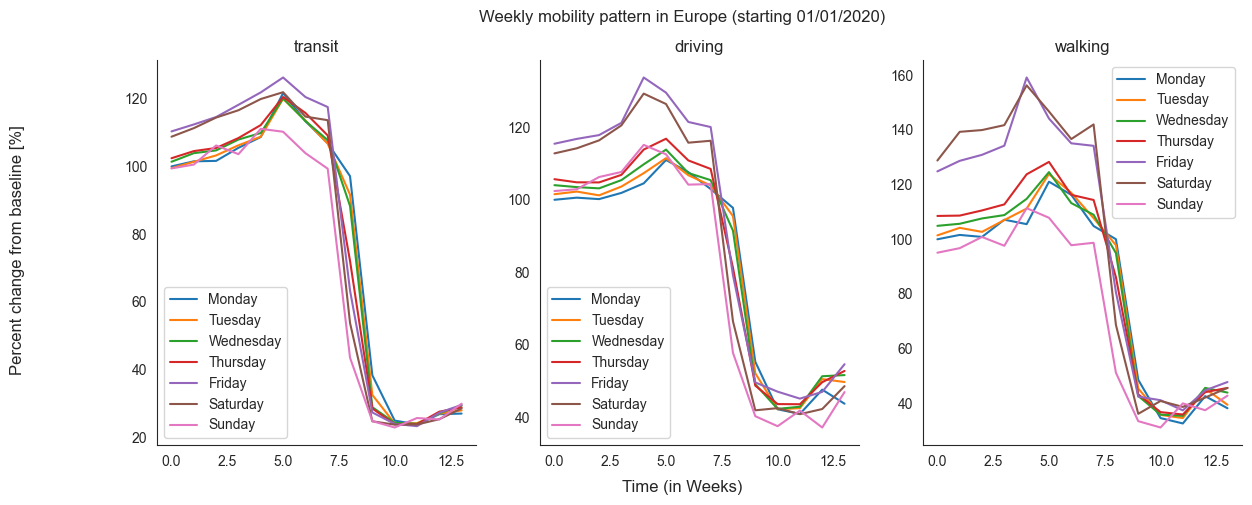

In [26]:
days = ['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.set_style("white")

fig, axs = plt.subplots(1,3, sharex = True, sharey = False, figsize = (14,5))
fig.supxlabel("Time (in Weeks)")
fig.supylabel("Percent change from baseline [%]")
fig.suptitle("Weekly mobility pattern in Europe (starting 01/01/2020)")

type_of_mobility = ["transit", "driving", "walking"]

for day in days:
    for idx, mobility in enumerate(type_of_mobility): 
        days_indf = date_df[date_df.day == day].date
        transit_test = apple_mobility_country[(apple_mobility_country.transportation_type == mobility) & (apple_mobility_country.continent == "EU")]
        transit_test_day = transit_test.loc[:,days_indf]
        default_x_ticks = range(14)
        axs[idx].plot(default_x_ticks,transit_test_day.mean()[0:14],label=day)
        axs[idx].set_title(mobility)
        axs[idx].legend()
    
sns.despine()
fig.savefig('img/weekly_mobility_pattern.png')

Fridays and Saturdays seem to be consistently higher across every category, at least before the lockdown. After the lockdown the trend is not really observable anymore and the weekly life rythm was disturbed

To ease the visual representation and have more meaningful trends, the data can (and should) be smoothed on a weekly basis (using a rolling window of 7 days)

In [71]:
#PLot the different type of mobilities evolution by continents
def plot_mobility(dataset, regions, plot_title, type_of_mobility= ["transit", "driving", "walking"], plot_name = 'dflt', save = False):
	sns.set_style("white")

	fig, axs = plt.subplots(len(regions),len(type_of_mobility), sharex=True,figsize=(18,7*len(regions)))#, squeeze = False)

    
	fig.tight_layout(pad=5, h_pad=2, w_pad =2)
	fig.supxlabel("Time [days]")
	fig.supylabel("Percent change from baseline [%]")

	if (len(regions)>1):
		i=0
		for region in regions:
			for idx, mobility in enumerate(type_of_mobility):
				data = dataset[(dataset.transportation_type == mobility) & (dataset.continent == region)]
				axs[i][idx].set_facecolor('white')

				# since we have no data for Africa for transit, we skip it
				if (region != "AF" or mobility != "transit"):
					data.loc[:,(data.dtypes == 'float64').values].apply(axs[i][idx].plot, axis=1)
					axs[i][idx].set_title(mobility + " in " + region)
					axs[i][idx].legend(data.region, ncol = 3, prop = {'size': 8})
					axs[i][idx].vlines("2020-03-11", ymin = 0, ymax = 160, label = "mobility restrictions")
					axs[i][idx].xaxis.set_tick_params(labelrotation = 45, labelsize=8)
					axs[i][idx].xaxis.set_major_locator(plt.MaxNLocator(10))
		
				i = i+1
	else:
		if (len(type_of_mobility)==1):
			for mobility in type_of_mobility:
				data = dataset[(dataset.transportation_type == mobility) & (dataset.continent == regions[0])]
				axs.set_facecolor('white')
				data.loc[:,(data.dtypes == 'float64').values].apply(axs.plot, axis=1)
				axs.set_title(mobility + " in " + regions[0])
				axs.legend(data.region, ncol = 3, prop = {'size': 8})
				axs.vlines("2020-03-11", ymin = 0, ymax = 160, label = "mobility restrictions")
				axs.xaxis.set_tick_params(labelrotation = 45, labelsize=8)
				axs.xaxis.set_major_locator(plt.MaxNLocator(10))
		else:
			axs = axs.flatten()
			for idx, mobility in enumerate(type_of_mobility):
				data = dataset[(dataset.transportation_type == mobility) & (dataset.continent == regions[0])]
				axs[idx].set_facecolor('white')
				data.loc[:,(data.dtypes == 'float64').values].apply(axs[idx].plot, axis=1)
				axs[idx].set_title(mobility + " in " + regions[0])
				axs[idx].legend(data.region, ncol = 3, prop = {'size': 8})
				axs[idx].vlines("2020-03-11", ymin = 0, ymax = 160, label = "mobility restrictions")
				axs[idx].xaxis.set_tick_params(labelrotation = 45, labelsize=8)
				axs[idx].xaxis.set_major_locator(plt.MaxNLocator(10))

        
	fig.suptitle(plot_title)

	#leave space at the top for the title
	#fig.subplots_adjust(top=0.9)
	sns.despine()
    
	plt.show()
	if save:
		fig.savefig('img/'+plot_name+'.png')

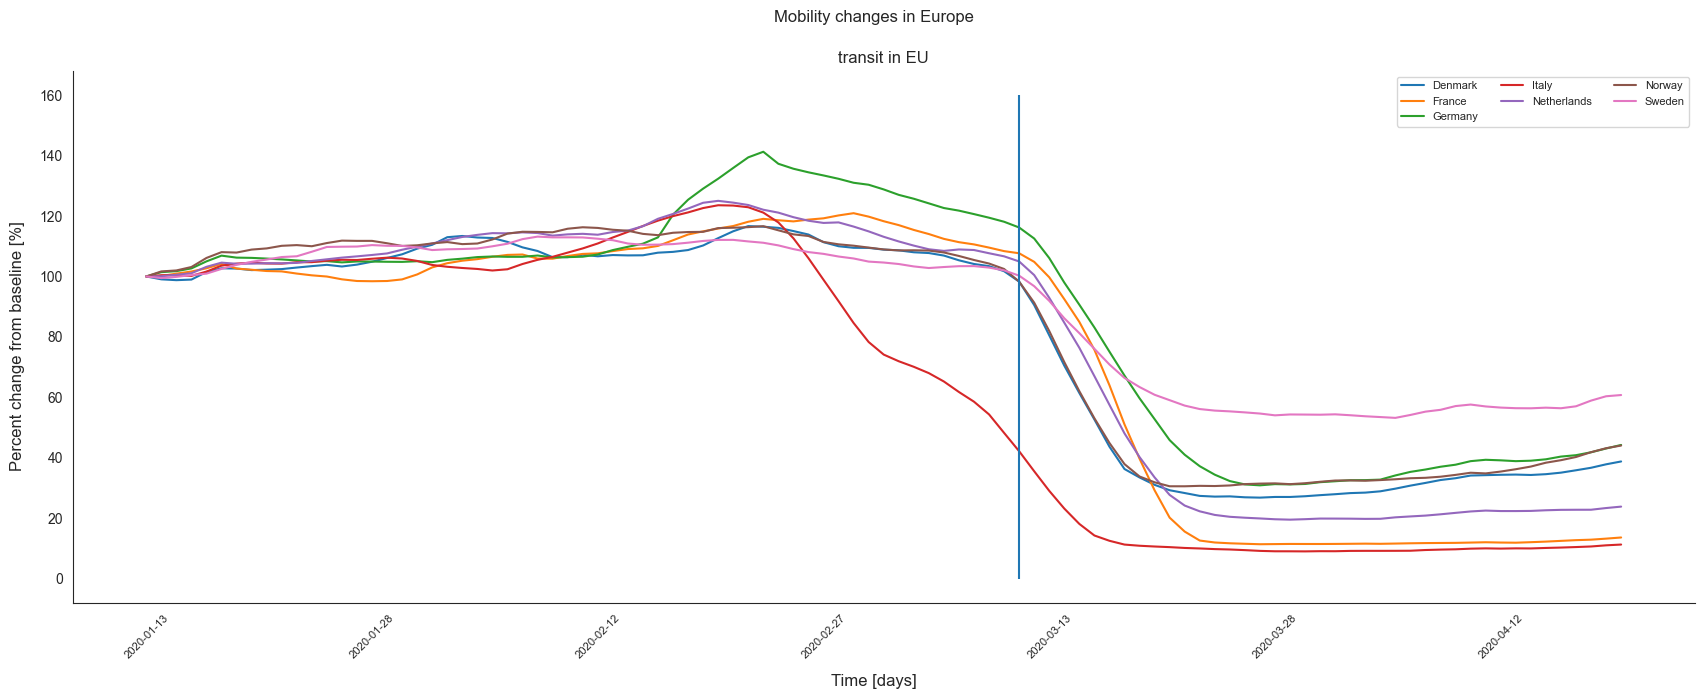

In [72]:
plot_mobility(dataset = apple_mobility_country_smoothed, regions = ["EU"], type_of_mobility = ['transit'], plot_title = 'Mobility changes in Europe',save = True, plot_name = 'mobility_europe_transit')


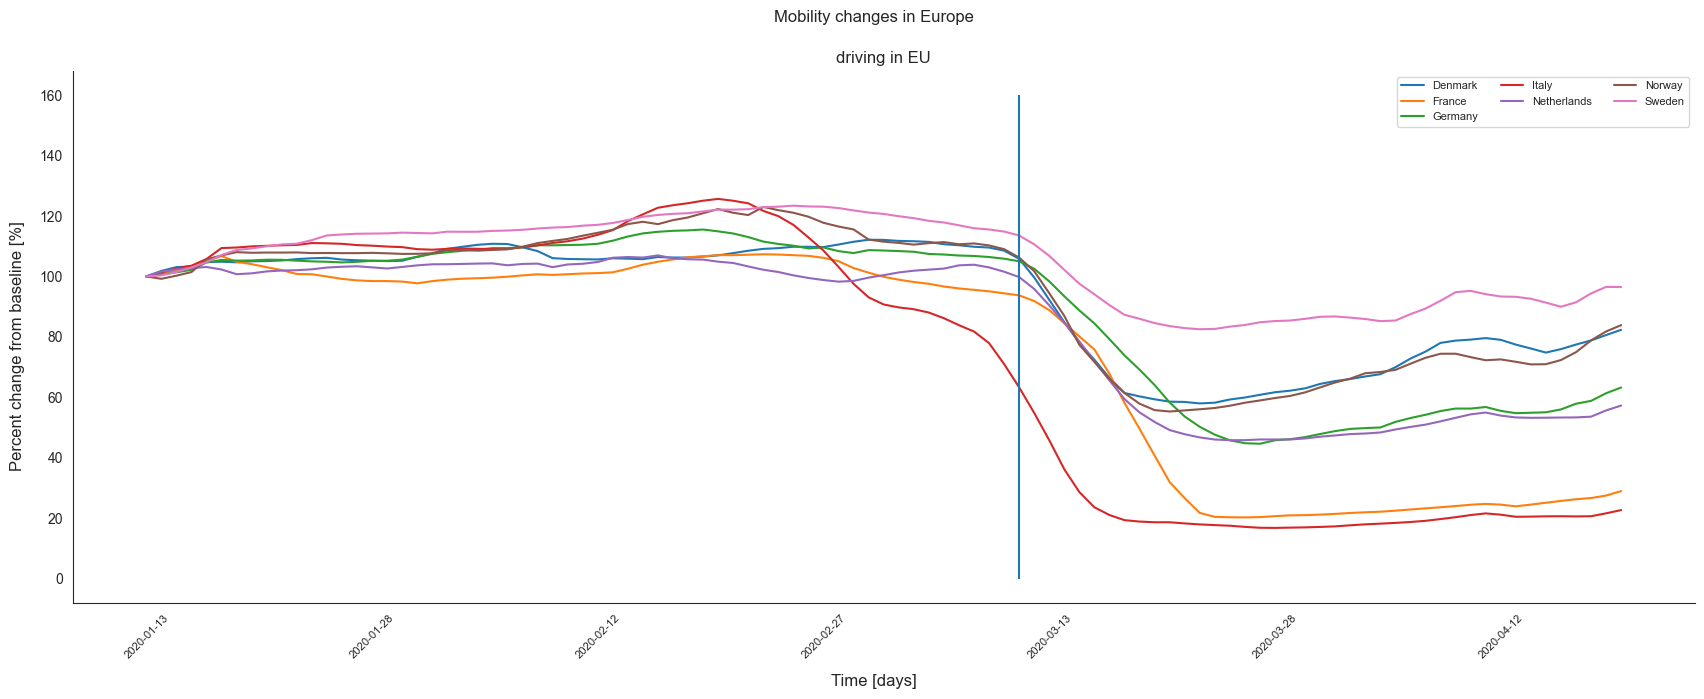

In [73]:
plot_mobility(dataset = apple_mobility_country_smoothed, regions = ["EU"], type_of_mobility = ['driving'], plot_title = 'Mobility changes in Europe',save = True, plot_name = 'mobility_europe_driving')

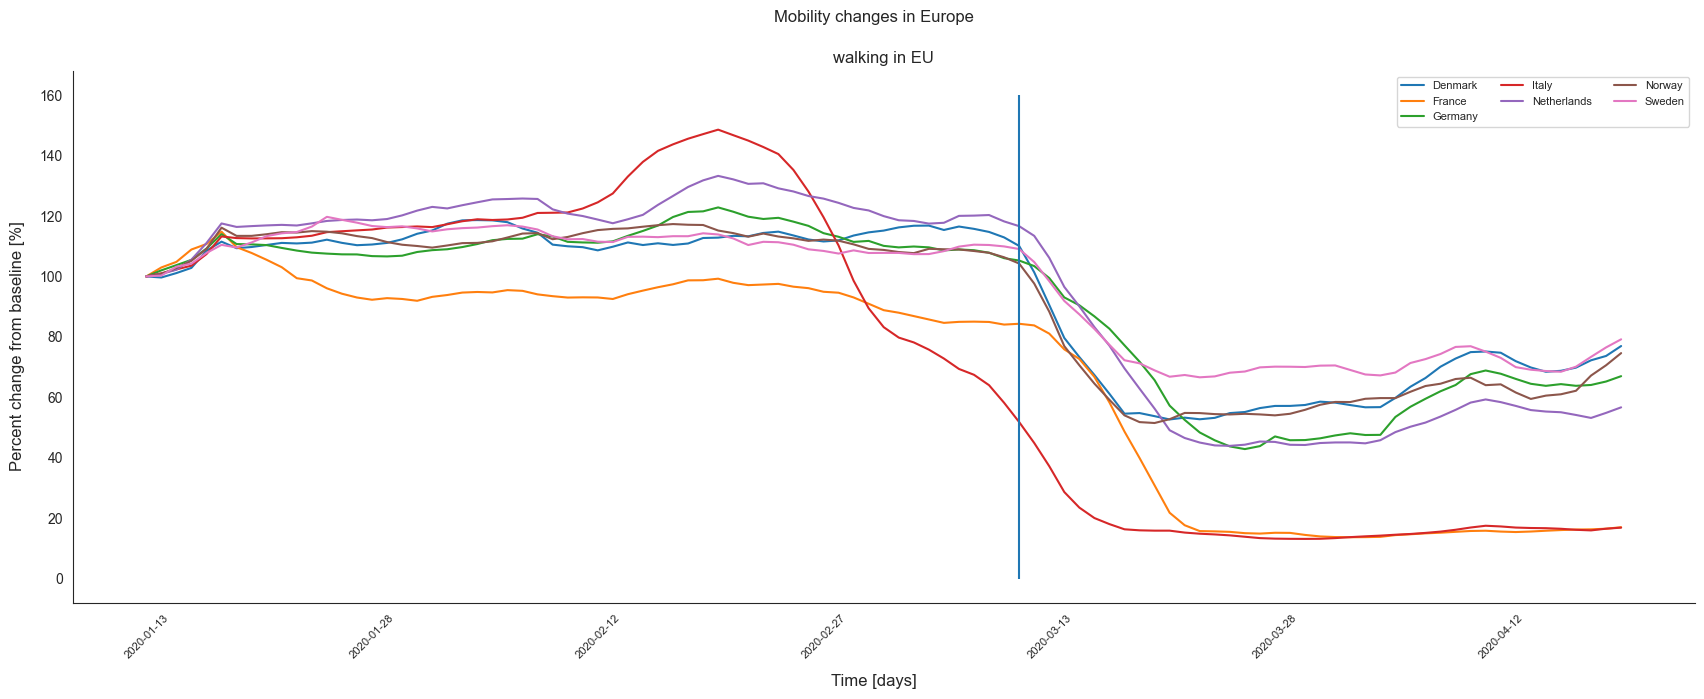

In [74]:
plot_mobility(dataset = apple_mobility_country_smoothed, regions = ["EU"], type_of_mobility = ['walking'], plot_title = 'Mobility changes in Europe',save = True, plot_name = 'mobility_europe_walking')


We now have data separated by countries and transit type, with the added information of continent and day of the week and smoothed on a weekly basis. 

We can now look at the detailed mobility trough the **globality dataset**.

As seen before, the mobility is cyclic on a weekly basic, to better see trends we need to smooth the data with a rolling window of size 7

In [28]:
#smooth data on weekly basis
mean_globality_europe_percent_change_col_smoothed = [s + "_smoothed" for s in mean_globality_europe_percent_change_col]
mean_globality_europe[mean_globality_europe_percent_change_col_smoothed] = mean_globality_europe[mean_globality_europe_percent_change_col].rolling(7).mean()
                      

For exemple in Italy (but also similarly in different countries), the time spent in retail and recreation, transit stations and workplaces dropped significantly, whereas the time spent at home increased. The time spent in parks tends to increase but the trend is less clear.

We can also anticipate that countries will have different regulations and plot two different countries : Italy and Sweden

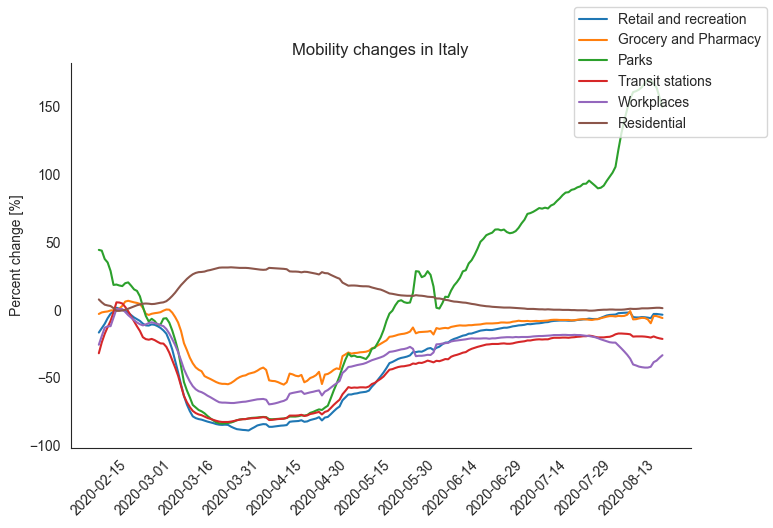

In [29]:
#Plotting for Italy
sns.set_style("white")
fig, ax = plt.subplots(figsize= (8, 5))

ax.plot(mean_globality_europe.loc['Italy',mean_globality_europe_percent_change_col_smoothed])
ax.xaxis.set_tick_params(rotation=45)
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_ylabel('Percent change [%]')
ax.set_title('Mobility changes in Italy')
fig.legend(['Retail and recreation','Grocery and Pharmacy','Parks','Transit stations','Workplaces','Residential'])

sns.despine()

plt.show()

fig.savefig('img/mobility_change_italy.png', bbox_inches = 'tight')

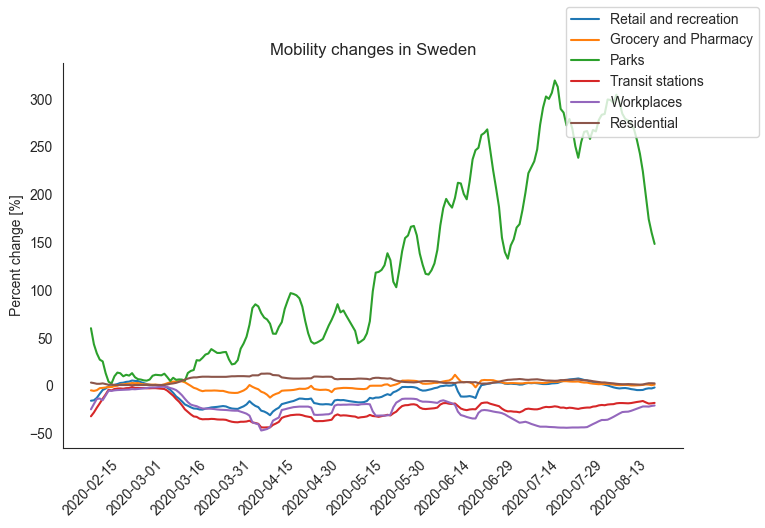

In [30]:
#Plotting for Sweden
sns.set_style("white")

fig, ax = plt.subplots(figsize= (8, 5))

ax.plot(mean_globality_europe.loc['Sweden',mean_globality_europe_percent_change_col_smoothed])
ax.xaxis.set_tick_params(rotation=45)
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_ylabel('Percent change [%]')
ax.set_title('Mobility changes in Sweden')
fig.legend(['Retail and recreation','Grocery and Pharmacy','Parks','Transit stations','Workplaces','Residential'])

sns.despine()

plt.show()

fig.savefig('img/mobility_change_sweden.png', bbox_inches = 'tight')

## 2. Is the mobility evolution correlated with a higher number of overall Wikipedia searches?


### 2.1 Data preprocessing

In this datatest, we have access to the aggregated wikipedia topics

In [75]:
#Loading the data
aggregate_dict = load_aggregated("data/aggregated_timeseries.json.gz")

How did the overall number of Wikipedia articles changed during the pandemic?

In [76]:
time_click.rolling(7).mean().index[0]

Timestamp('2018-01-01 00:00:00')

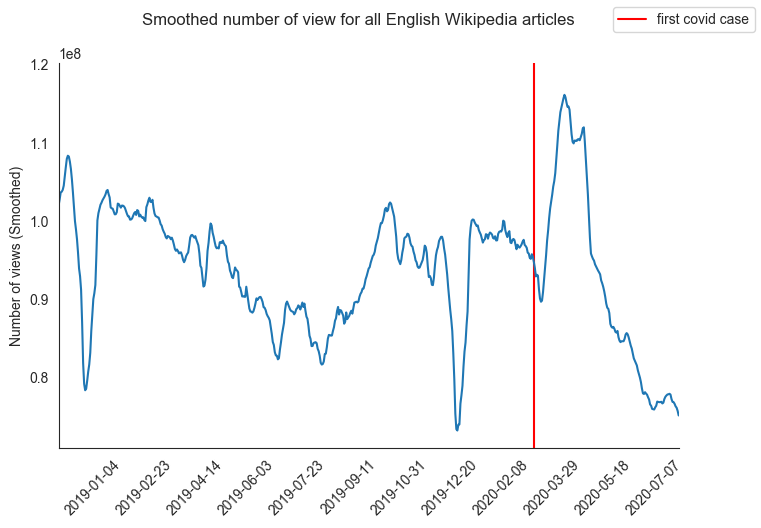

In [77]:
time_click = aggregate_dict['en']['sum']
sns.set_style("white")
fig, ax = plt.subplots(figsize= (8, 5))
ax.plot(time_click.rolling(7).mean().index, time_click.rolling(7).mean())
ax.xaxis.set_tick_params(rotation=45)
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.xlim(datetime.datetime.strptime('2018-12-01', '%Y-%m-%d'), datetime.datetime.strptime('2020-07-31', '%Y-%m-%d'))
ax.axvline(datetime.datetime.strptime('2020-03-11', '%Y-%m-%d'), ls="-", color="red", zorder=1, label = "first covid case") #2020-03-11: WHO declares covid-19 world pandemic
ax.set_ylabel('Number of views (Smoothed)')
fig.suptitle('Smoothed number of view for all English Wikipedia articles')
fig.legend()
sns.despine()
plt.show()


The red line shows the day (11th of March 2020) when the World Health Organization (WHO) declared the COVID-19 outbreak a global pandemic. This will be the reference time for the changes in social behaviour that we will try to identify.

[source: Wikipedia, https://en.wikipedia.org/wiki/COVID-19_pandemic]

In [78]:
columns = ["sr", "it", "fr", "en", "nl", "ko", "de", "fi", "ja", "no", "sv", "da"]
ecology_desktop = pd.DataFrame()
ecology_mobile = pd.DataFrame()
ecology_agg = pd.DataFrame()
all_agg = pd.DataFrame()

for country in columns:
    ecology_desktop[country] = pd.DataFrame.from_dict(aggregate_dict[country]['topics']['STEM.Earth and environment']['sum'])
    print(country)
    colname_mobile = country+'.m'
    ecology_mobile[colname_mobile] = pd.DataFrame.from_dict(aggregate_dict[colname_mobile]['topics']['STEM.Earth and environment']['sum'])
    colname_agg = country+'.agg'
    ecology_agg[colname_agg] = pd.DataFrame.from_dict(aggregate_dict[colname_mobile]['topics']['STEM.Earth and environment']['sum']) + pd.DataFrame.from_dict(aggregate_dict[country]['topics']['STEM.Earth and environment']['sum'])

sr
it
fr
en
nl
ko
de
fi
ja
no
sv
da


In [79]:
ecology_desktop.head()

sr     it      fr       en     nl    ko      de    fi     ja  \
2018-01-01  1282  20273   60078   709659  12191  5120   84060  4987  38004   
2018-01-02  1956  41790   92710   973197  22430  5995  145048  7407  46235   
2018-01-03  2150  45349  104062  1115237  28073  7069  171493  7117  55066   
2018-01-04  2628  47540  106732  1097507  24522  6201  157776  7637  73793   
2018-01-05  2368  43588   98577  1016865  21832  5942  143471  6912  85140   

              no  sv    da  
2018-01-01  2906   0  1987  
2018-01-02  6096   0  4289  
2018-01-03  8860   0  6872  
2018-01-04  9953   0  8372  
2018-01-05  8706   0  7605

### 2.2 Data analysis

## 3. Globally, did interest in ecology change during the covid pandemic?

### 3.1 Data preprocessing

**Ecology searches (Wikipedia articles)**

Since the number of views for the overall category Earth and environment is not bringing a lot of information, we want to dig further and downloads the information of the articles contained within the Climate change category

Data taken from [massviews](https://pageviews.wmcloud.org/massviews/), it is all articles from category [climate_change](https://en.wikipedia.org/wiki/Category:Climate_change)

In [81]:
#We take the english Wikipedia as a reference for the global number of articles in the category Climate Change
climate_change_cat = pd.read_csv(CLIMATE_CHANGE_WIKI_EN)
climate_change_cat = climate_change_cat.append(climate_change_cat.sum(axis=0),ignore_index=True)


C:\Users\arthu\AppData\Local\Temp\ipykernel_25588\1621959592.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  climate_change_cat = climate_change_cat.append(climate_change_cat.sum(axis=0),ignore_index=True)


In [82]:
climate_change_cat.head()

Title  2018-01-01  2018-01-02  2018-01-03  \
0                     Climate change        2332        3385        4089   
1  History of climate change science         209         294         331   
2                Climate engineering         264         340         488   
3                     Global cooling         599         772         938   
4                     Global dimming         121         158         216   

   2018-01-04  2018-01-05  2018-01-06  2018-01-07  2018-01-08  2018-01-09  \
0        4400        3441        3500        4040        5371        6092   
1         306         266         265         285         326         264   
2         463         416         371         400         426         461   
3         867         977         841         745         813         621   
4         206         200         193         180         177         191   

   ...  2021-12-23  2021-12-24  2021-12-25  2021-12-26  2021-12-27  \
0  ...        3401        4426        3669        4085        5030   
1  ...         162         191         173         234         236   
2  ...         185         136         132         199         192   
3  ...         186         228         187         224         366   
4  ...         114          85         115         122         122   

   2021-12-28  2021-12-29  2021-12-30  2021-12-31  2022-01-01  
0        4477        4437        4375        3809        3733  
1         220         238         233         233         183  
2         228         218         224         189         249  
3         409         293         305         234         199  
4         104         102         125         128         109  

[5 rows x 1463 columns]

In [83]:
climate_change_search = "https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Climate_change/monthly/2019010100/2020123100"
climate_change_search = pd.read_json(climate_change_search)

In [84]:
climate_change_search.head()

items
0  {'project': 'en.wikipedia', 'article': 'Climat...
1  {'project': 'en.wikipedia', 'article': 'Climat...
2  {'project': 'en.wikipedia', 'article': 'Climat...
3  {'project': 'en.wikipedia', 'article': 'Climat...
4  {'project': 'en.wikipedia', 'article': 'Climat...

In [85]:
#put the timestamp and the number of views in a dataframe
#aplly to all items in the list the function
climate_change_df = climate_change_search
climate_change_df['views'] = climate_change_search['items'].apply(lambda x: x['views'])
climate_change_df['timestamp'] = climate_change_search['items'].apply(lambda x: x['timestamp'])

#convert timestamp to datetime
climate_change_df['timestamp'] = pd.to_datetime(climate_change_df['timestamp'], format='%Y%m%d%H')


---

In [86]:
#Import climate change category dataset for different languages directly from massviews
#English
climate_change_cat_en = pd.read_csv(CLIMATE_CHANGE_WIKI_EN)
climate_change_cat_en = climate_change_cat_en.append(climate_change_cat_en.sum(axis=0),ignore_index=True)

#German
climate_change_cat_de = pd.read_csv(CLIMATE_CHANGE_WIKI_DE)
climate_change_cat_de = climate_change_cat_de.append(climate_change_cat_de.sum(axis=0),ignore_index=True)

#French
climate_change_cat_fr = pd.read_csv(CLIMATE_CHANGE_WIKI_FR)
climate_change_cat_fr = climate_change_cat_fr.append(climate_change_cat_fr.sum(axis=0),ignore_index=True)

#Italian
climate_change_cat_it = pd.read_csv(CLIMATE_CHANGE_WIKI_IT)
climate_change_cat_it = climate_change_cat_it.append(climate_change_cat_it.sum(axis=0),ignore_index=True)

#Norwegian
climate_change_cat_no = pd.read_csv(CLIMATE_CHANGE_WIKI_NO)
climate_change_cat_no = climate_change_cat_no.append(climate_change_cat_no.sum(axis=0),ignore_index=True)

#Danish
climate_change_cat_da = pd.read_csv(CLIMATE_CHANGE_WIKI_DA)
climate_change_cat_da = climate_change_cat_da.append(climate_change_cat_da.sum(axis=0),ignore_index=True)

#Dutch
climate_change_cat_nl = pd.read_csv(CLIMATE_CHANGE_WIKI_NL)
climate_change_cat_nl = climate_change_cat_nl.append(climate_change_cat_nl.sum(axis=0),ignore_index=True)

#Sweden
climate_change_cat_sw = pd.read_csv(CLIMATE_CHANGE_WIKI_SW)
climate_change_cat_sw = climate_change_cat_sw.append(climate_change_cat_sw.sum(axis=0),ignore_index=True)


C:\Users\arthu\AppData\Local\Temp\ipykernel_25588\1611033756.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  climate_change_cat_en = climate_change_cat_en.append(climate_change_cat_en.sum(axis=0),ignore_index=True)
C:\Users\arthu\AppData\Local\Temp\ipykernel_25588\1611033756.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  climate_change_cat_de = climate_change_cat_de.append(climate_change_cat_de.sum(axis=0),ignore_index=True)
C:\Users\arthu\AppData\Local\Temp\ipykernel_25588\1611033756.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  climate_change_cat_fr = climate_change_cat_fr.append(climate_change_cat_fr.sum(axis=0),ignore_index=True)
C:\Users\arthu\AppData\Local\Temp\ipykernel_25588\1611033756.py:16: FutureW

In [87]:
# Load Wikipedia global views data
with gzip.open(TIME_SERIE_DATASET, 'rt') as f:
    wikipedia_global_views = json.load(f)

# Helper function to calculate mean total pageviews using the aggregate_dict
def calculate_mean_pageviews(country, start_date, end_date):
    df_wikipedia_global_views = pd.DataFrame.from_dict(wikipedia_global_views[country]['sum'], orient='index')
    start_date = start_date.strftime('%Y-%m-%d %H:%M:%S')
    end_date = end_date.strftime('%Y-%m-%d %H:%M:%S')
    return df_wikipedia_global_views.loc[start_date:end_date].mean().values[0]

# Helper function to calculate mean pageviews for a certain period of time for a certain country
def calculate_mean_category_pageviews(country, category, start_date, end_date):
    start_date = start_date.strftime('%Y-%m-%d')
    end_date = end_date.strftime('%Y-%m-%d')
    category_pageviews_dist = category[country].loc[:, start_date:end_date].iloc[-1:]
    return category_pageviews_dist.mean(axis=1).values[0]

# Helper function to calculate dates for the lockdown period and the previous period with the same duration
def calculate_lockdown_dates(interventions, country):
    lockdown_date = interventions.loc['Lockdown', country]
    normalcy_date = interventions.loc['Normalcy', country]
    lockdown_duration = normalcy_date - lockdown_date
    previous_start_date = lockdown_date - lockdown_duration
    previous_end_date = lockdown_date
    return lockdown_date, normalcy_date, previous_start_date, previous_end_date

# Helper function to calculate standardized value
def calculate_std(pageviews, mean_pageviews):
    return pageviews / mean_pageviews

# List to store climate pageviews during lockdown for each country
countries_id = ['fr','de','it','no','da','nl','sv']
countries = ['France','Germany','Italy','Norway','Denmark','Netherlands','Sweden']

# make a dictionary to store the data for each country
climate_change_cat = {'fr': climate_change_cat_fr, 'de': climate_change_cat_de, 'it': climate_change_cat_it, 'no': climate_change_cat_no, 'da': climate_change_cat_da, 'nl': climate_change_cat_nl, 'sv': climate_change_cat_sw}
climate_pageviews_lockdown = []
climate_pageviews_previous = []
climate_pageviews_lockdown_std = []
climate_pageviews_previous_std = []
 
# Iterate over countries
for country in countries_id:
    lockdown_date, normalcy_date, previous_start_date, previous_end_date = calculate_lockdown_dates(interventions, country)

    climate_pageviews_lockdown_country = calculate_mean_category_pageviews(country, climate_change_cat, lockdown_date, normalcy_date)
    climate_pageviews_lockdown.append(climate_pageviews_lockdown_country)
    climate_pageviews_previous_country = calculate_mean_category_pageviews(country, climate_change_cat, previous_start_date, previous_end_date)
    climate_pageviews_previous.append(climate_pageviews_previous_country)
 
    mean_lockdown_country = calculate_mean_pageviews(country, lockdown_date, normalcy_date)
    mean_previous_country = calculate_mean_pageviews(country, previous_start_date, previous_end_date)

    climate_pageviews_lockdown_country_std = calculate_std(climate_pageviews_lockdown_country, mean_lockdown_country)
    climate_pageviews_previous_country_std = calculate_std(climate_pageviews_previous_country, mean_previous_country)
    climate_pageviews_lockdown_std.append(climate_pageviews_lockdown_country_std)
    climate_pageviews_previous_std.append(climate_pageviews_previous_country_std)


### 3.2 Data analysis

 Plotting aggregated data for each country (red line = first case, green line = return to normalcy) in the category 'STEM Earth and Envrionment' 

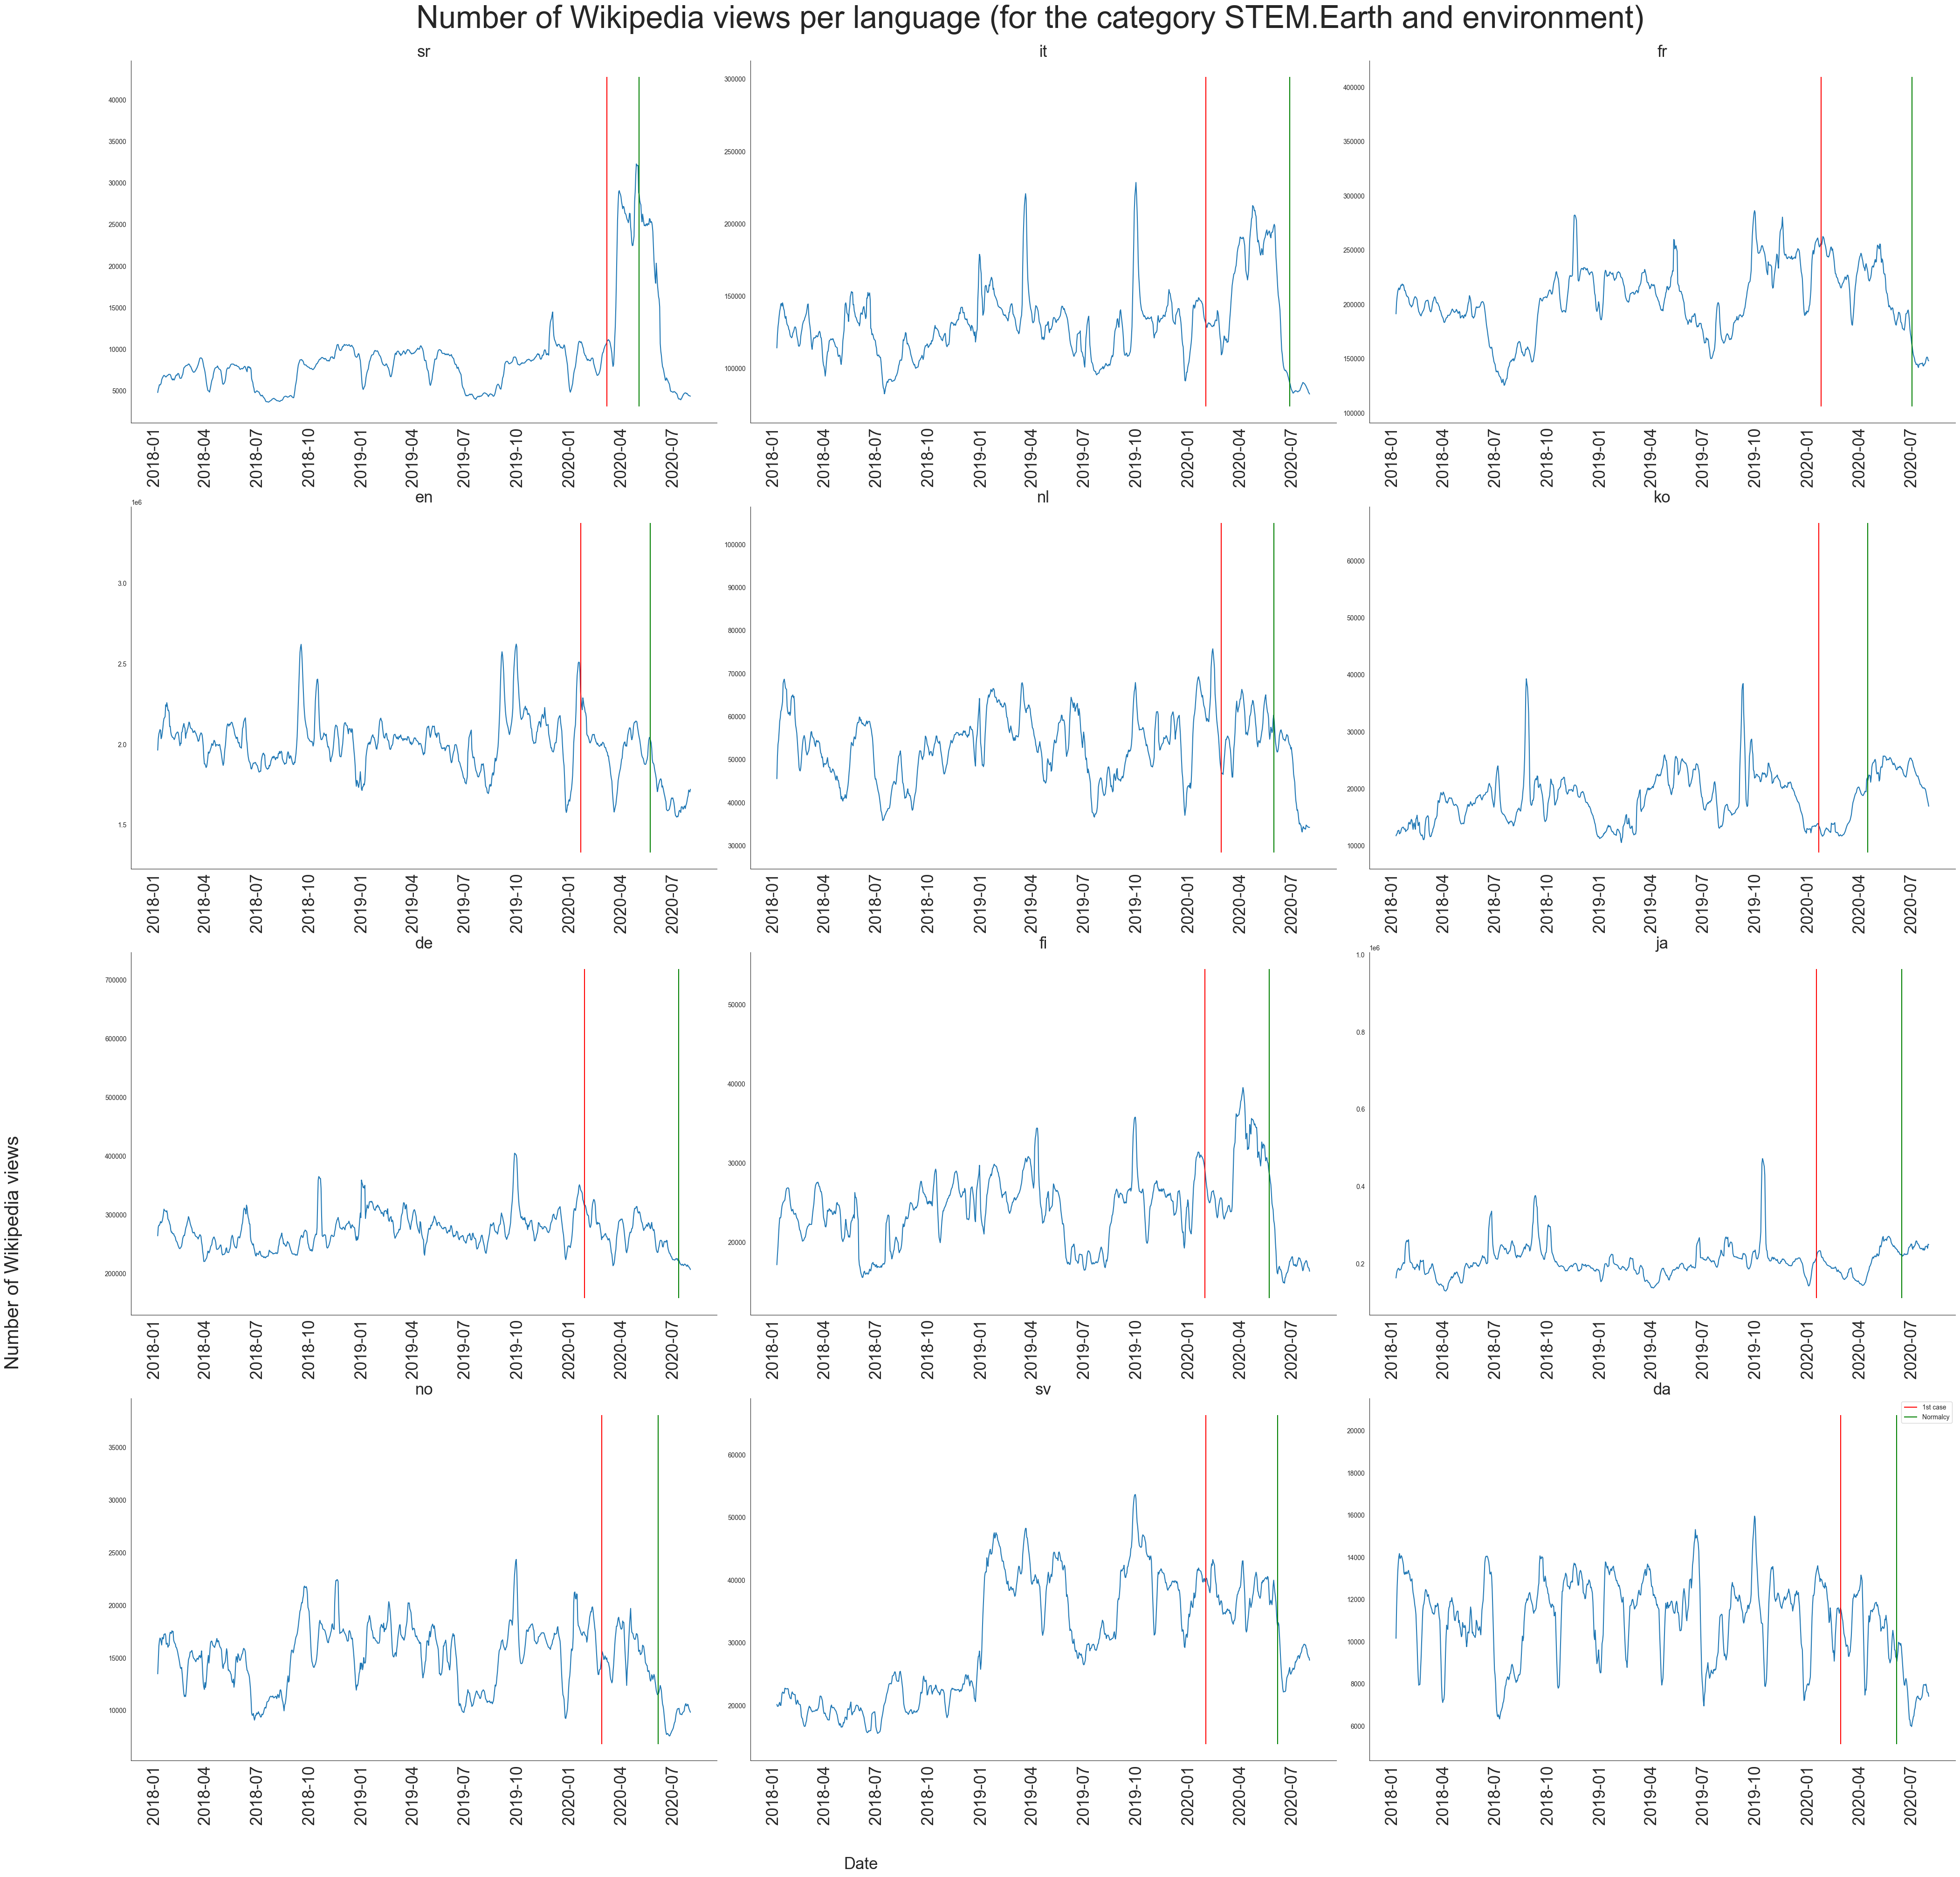

In [88]:
sns.set_style('white')
fig, ax = plt.subplots(4,3,figsize= (40, 40))
plt.subplots_adjust(hspace=0.5)
for country,ax in zip(columns, ax.ravel()):
    sbplt = ax
    sbplt.set_title(country, fontsize=25)
    sbplt.tick_params(axis='x', rotation=90,labelsize=25)
    sns.lineplot(data=ecology_agg[country+'.agg'].rolling(7).mean(), ax=sbplt)
    sbplt.vlines(interventions[country]['1st case'], ymin=pd.DataFrame.min(ecology_agg[country+'.agg']), ymax=pd.DataFrame.max(ecology_agg[country+'.agg']), color='red', label = '1st case')
    sbplt.vlines(interventions[country]['Normalcy'], ymin=pd.DataFrame.min(ecology_agg[country+'.agg']), ymax=pd.DataFrame.max(ecology_agg[country+'.agg']), color='green', label = 'Normalcy')
    sbplt.set(xlabel=None)
    sbplt.set(ylabel=None)
    
fig.tight_layout()
fig.text(0.4,-0.02, "Date", fontsize=25)
fig.text(-0.05,0.25, "Number of Wikipedia views", rotation = 90, fontsize=30)

fig.suptitle("Number of Wikipedia views per language (for the category STEM.Earth and environment)", fontsize=48)
fig.subplots_adjust(top=0.95)
plt.legend()
sns.despine() 
plt.show()

We can see that for the category `STEM.Earth and environment`, there is no clear trend and the behavior is different for each language. It would make more sense to look for a more specific category linked to the climate change (see [next section](#ecology-searches-wikipedia-articles-preliminary-analysis)) to see if in this case there is a trend

We need to dig in a little bit and diversify the topics around *Climate change* with the help of the Wikipedia API.  

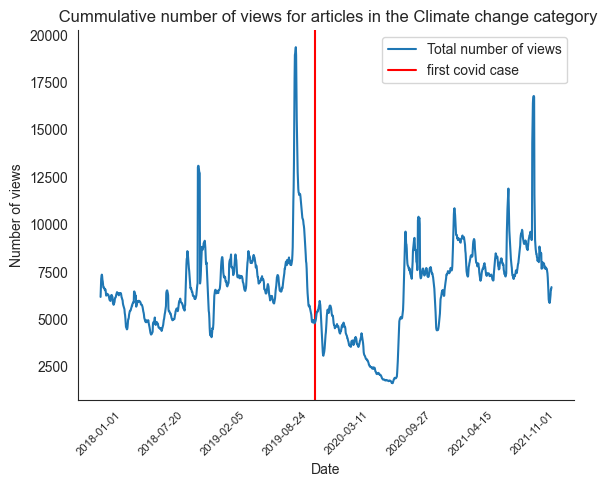

In [89]:
climate_change_cummaltive = climate_change_cat_en.iloc[climate_change_cat_en.shape[0]-1,1:].rolling(7).mean()
sns.set_style('white')
plt.axes().xaxis.set_major_locator(plt.MaxNLocator(10))
plt.plot(climate_change_cummaltive.index,climate_change_cummaltive.values, label='Total number of views')
plt.xticks(rotation = 45, fontsize=8)
plt.ylabel('Number of views')
plt.title(' Cummulative number of views for articles in the Climate change category')
plt.xlabel('Date')
plt.axvline('2019-12-01', ls="-", color="red", zorder=1, label = "first covid case")
plt.legend()
sns.despine()
plt.show()
fig.savefig('img/cummulative_views_climate_change.png', bbox_inches = 'tight')

Once again, the trend is confirmed, there seems to be a global decrease in the cummulative number of views during the covid lockdown

We can find a way to visualize the change in views for topic related to climate change

In [90]:
def plot_global_trend(pageviews_previous,pageviews_lockdown,countries,title):
    # plotting the points
    sns.set_style("white")

    plt.subplots(figsize=(8, 12))

    plt.scatter(np.zeros(len(pageviews_previous)),pageviews_previous,s=80, alpha = 0.5)
    plt.scatter(np.ones(len(pageviews_lockdown)),pageviews_lockdown,s=80, alpha = 0.5)

    # plotting the lines
    for i in range(len(pageviews_previous)):
        plt.plot( [0,1], [pageviews_previous[i], pageviews_lockdown[i]], c='k')
        plt.text( 0, pageviews_previous[i], countries[i])


    plt.xticks([0,1], ['before', 'after'])
    plt.ylabel(title)
    sns.despine()
    plt.show()

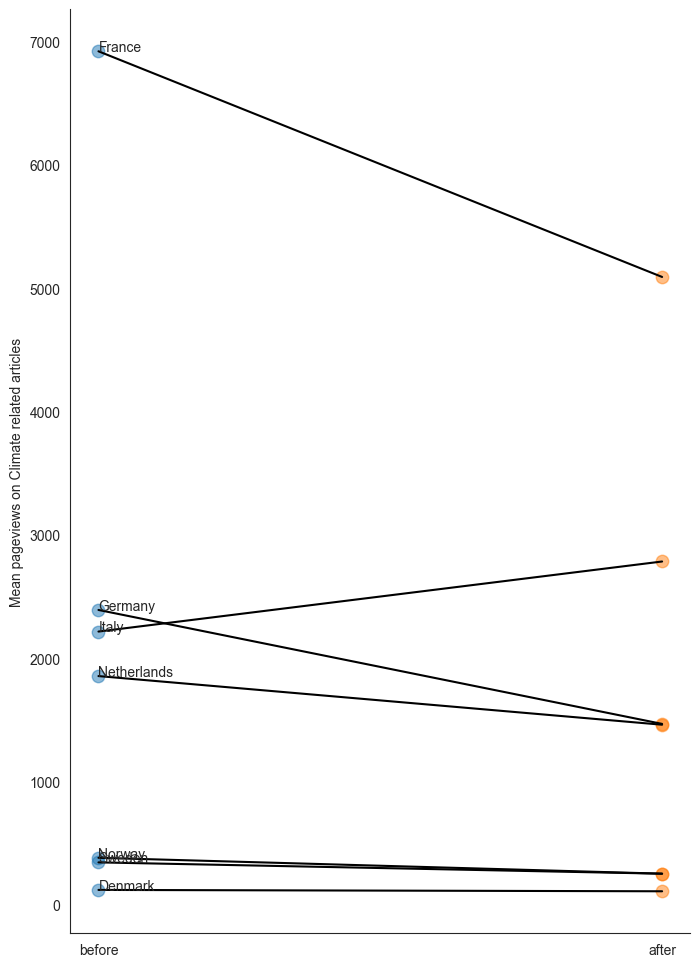

In [91]:
plot_global_trend(climate_pageviews_previous,climate_pageviews_lockdown,countries,'Mean pageviews on Climate related articles')

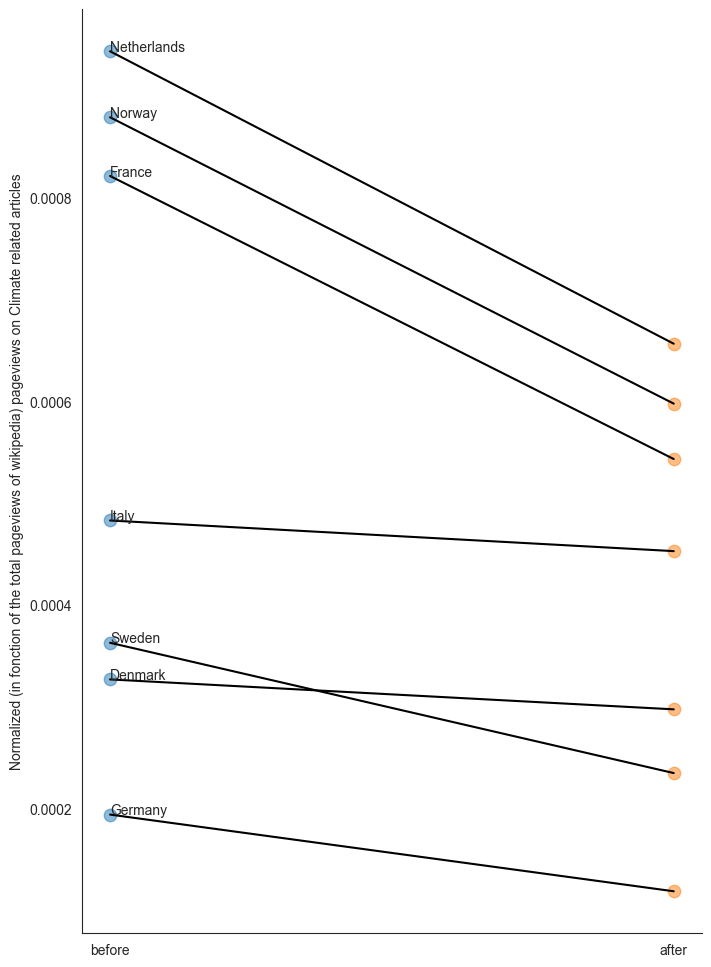

In [92]:
plot_global_trend(climate_pageviews_previous_std,climate_pageviews_lockdown_std,countries,'Normalized (in fonction of the total pageviews of wikipedia) pageviews on Climate related articles')

---

It is difficult to discern any trend at this scale,but we can use this information to see if a trend in a specific category is linked specially to this category or it just follows the global trend of the interest for Wikipedia. For this it might be interesting to look at the relation with the lockdown impact too

In [94]:

climate_change_df = [climate_change_cat_en , climate_change_cat_de , climate_change_cat_fr, climate_change_cat_it, climate_change_cat_no, climate_change_cat_da , climate_change_cat_nl ]
codes = ["en", "de", "fr", "it", "no", "dk", "nl"]

climate_pageviews = pd.DataFrame( columns  = codes)
for country,code in zip(climate_change_df,codes):
    dates = (country.iloc[:,1:].columns) #take the dates
    pageviews = country.values[-1][1:] #take the pageviews
    climate_pageviews[code]=pageviews
    climate_pageviews.index = dates


In [95]:

df = global_mobility.copy()
agg = climate_pageviews.copy()
    
baseline = (20200103, 20200206)
start_baseline = datetime.datetime.strptime(str(baseline[0]), "%Y%m%d")
end_baseline = datetime.datetime.strptime(str(baseline[1]), "%Y%m%d")

dfs = []
countries_id_iso = ['fr','de','it','no','dk','nl','rs', 'se'] #Two letter code corresponding to iso norm

d=[]
d = {"lang": pd.Series(countries_id),
    "pageview_pre": climate_pageviews_previous_std,
    "pageview_pos": climate_pageviews_lockdown_std}

df_results = pd.DataFrame(d)
df_results.index = df_results["lang"]

for country,country_iso in zip(countries_id,countries_id_iso):
    dates = calculate_lockdown_dates(interventions, country)
    tmp = df[(df["country_region_code"] == country_iso.upper()) & (df["sub_region_1"].isna()) &
            (df["metro_area"].isna())].loc[:, ["date", "residential_percent_change_from_baseline"]].set_index("date")
    tmp.index = pd.to_datetime(tmp.index)
    tmp = tmp["residential_percent_change_from_baseline"]
    mobility = interventions.loc["Mobility", country]
    pre = [mobility - relativedelta(days=28), mobility]
    pos = [mobility, mobility + relativedelta(days=28)]

    mask_pre = (tmp.index >= pre[0]) & (tmp.index < pre[1])
    mask_pos = (tmp.index >= pos[0]) & (tmp.index < pos[1])
    df_results.loc[country,"mobility_pre"] = tmp[mask_pre].mean()
    df_results.loc[country,"mobility_pos"] = tmp[mask_pos].mean()


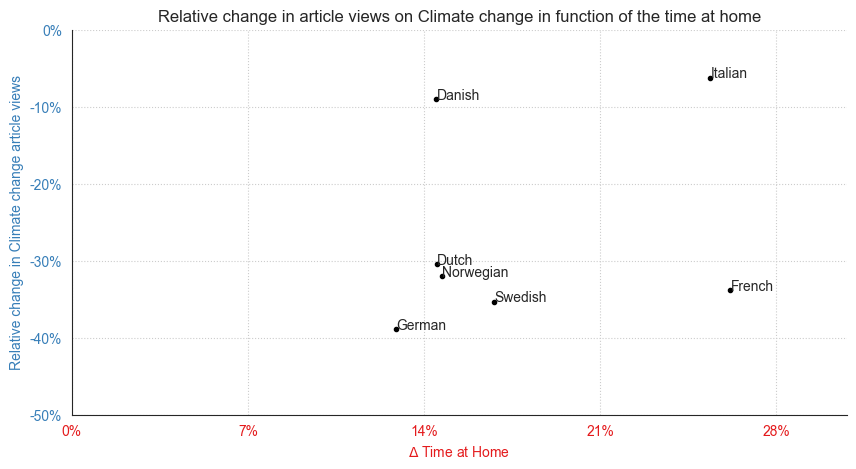

In [101]:
months_fmt = mdates.DateFormatter('%d\n%B')
day_fmt = mdates.DateFormatter('%d')

fig, ax = plt.subplots(figsize= (10, 5))

idx = 0

sns.set_style("white")

for code in countries_id:
    if code == "en":
        continue
    df_ = df_results[df_results.lang == code]
    
    vals = df_.values[0]
    ax.scatter([(vals[4] - vals[3])],
               [(vals[2] - vals[1])/vals[1]],
               alpha=1, marker=".", color="black")
    ax.text( (vals[4] - vals[3]), (vals[2] - vals[1])/vals[1],helper_langs[vals[0]], size=10, transform=ax.transData)

ax.set_yticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0])
ax.set_yticklabels(["-50%", "-40%", "-30%", "-20%", "-10%", "0%"], color="#377eb8")
ax.set_ylim([-0.5, 0])


ax.set_xticks([0, 7, 14, 21, 28])
ax.set_xticklabels(["0%", "7%", "14%", "21%", "28%"], color="#e41a1c")
ax.set_xlim([0, 30.8])
ax.grid(ls=":")

ax.set_xlabel("$\Delta$ Time at Home", color="#e41a1c")
ax.set_ylabel("Relative change in Climate change article views", color="#377eb8")


lines = [
    Line2D([0], [0], color="#e41a1c", lw=1.5, ls="-"),
    Line2D([0], [0], color="#377eb8", lw=1.5, ls="-."),
    Line2D([0], [0], color="#000000", lw=1.5, ls=":")

]
plt.title('Relative change in article views on Climate change in function of the time at home')
sns.despine()

plt.show()

## 4. How did the severity of lockdown in a country have an impact on the disinterest toward ecological topics? (Does a more severe lockdown increases the observed trends?) 

### 4.1 Data preprocessing

### 4.2 Data analysis

An idea would be to compute a metrics indicative of the restrictiveness of the lockdown in each country. To do so we can add or substract percent change in every category in absolute number. Categories can be labelled as having a positive or negative impact on lockdown measures. For instance, to have an idea of level of lockdown you would substract values of percent change in workplace, transit, retail and recreation station (which were the typically restricted area, thus high change in negative value would have high positive impact on the impact factor) and maybe add residential (if it is increased, the impact factor should be stronger) and maybe substract Parks and residential (if it is increased, it is a less strict lockdown, if it is deacreased it is a more strict lockdown). As everything is in percent change it already is in the same unit.

In [102]:
mean_globality_europe['lockdown_impact_factor'] = -mean_globality_europe['transit_stations_percent_change_from_baseline']-mean_globality_europe['workplaces_percent_change_from_baseline']-mean_globality_europe['retail_and_recreation_percent_change_from_baseline']+mean_globality_europe['residential_percent_change_from_baseline'] #+mean_globality_europe['parks_percent_change_from_baseline']
mean_globality_europe['lockdown_smooth'] = mean_globality_europe['lockdown_impact_factor'].rolling(7).mean()


As observed in the analysis part, it is important to use weekly smoothed data.

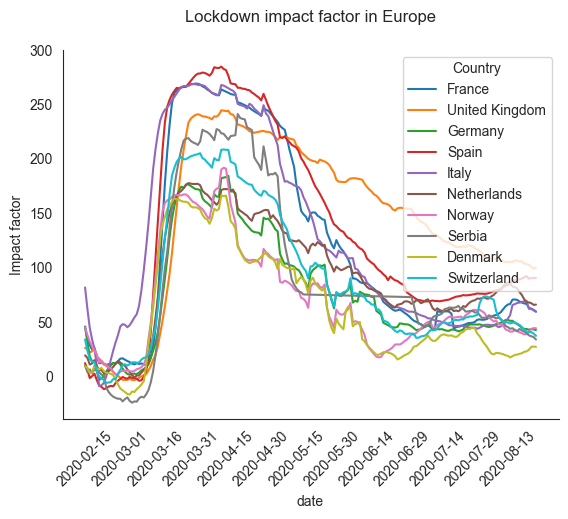

In [104]:
fig,ax=plt.subplots()
sns.set_style("white")
ax.set_facecolor('white')
ax=sns.lineplot(data = mean_globality_europe.loc[['France','United Kingdom','Germany','Spain','Italy','Netherlands','Norway','Serbia','Denmark', 'Switzerland']], 
                x ='date', y ='lockdown_smooth',hue = 'Country')
ax.tick_params(axis ='x',rotation = 45)
ax.xaxis.set_major_locator(plt.MaxNLocator(20))

ax.set_title('Lockdown impact factor in Europe',pad =20)
ax.set_ylabel('Impact factor')
sns.despine()
fig.savefig('img/smoothed_lockdown_impact.png', bbox_inches = 'tight')

Already in this graph you can see the difference between more strict politics such as France or Italy, and less restrictive politics such as the one in Sweden.  

Based on this we can expect the attitude towards climate change to be impacted differently in different countries

Look at the impact factor instead of the time spent a home

In [113]:
country = ['France','Germany','Italy','Norway','Denmark','Netherlands','Sweden']
country_rating = mean_globality_europe.groupby('Country')['lockdown_impact_factor'].sum()[country] #.sort_values(ascending=False)
country_rating

Country
France         22856.0
Germany        14803.0
Italy          24066.0
Norway         13692.0
Denmark        12036.0
Netherlands    17899.0
Sweden         11764.0
Name: lockdown_impact_factor, dtype: float64

In [114]:
country_rating_normalized = country_rating/country_rating.max()
country_rating_normalized


Country
France         0.949722
Germany        0.615100
Italy          1.000000
Norway         0.568935
Denmark        0.500125
Netherlands    0.743746
Sweden         0.488822
Name: lockdown_impact_factor, dtype: float64

In [117]:
df_results_impact = df_results.copy()
df_results_impact['impact_normalized']=country_rating_normalized.values

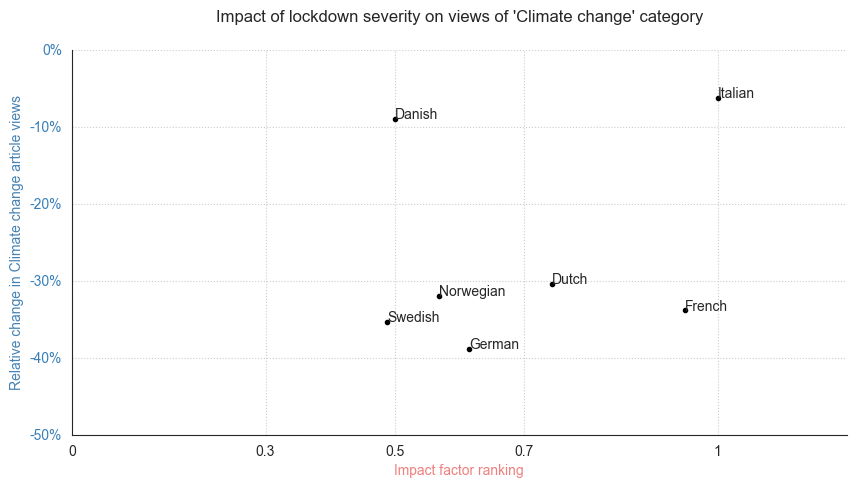

In [119]:
import matplotlib.dates as mdates
from matplotlib.lines import Line2D

months_fmt = mdates.DateFormatter('%d\n%B')
day_fmt = mdates.DateFormatter('%d')

fig, ax = plt.subplots(figsize= (10, 5))

idx = 0

sns.set_style("white")

for code in countries_id:
    if code == "en":
        continue
    df_ = df_results_impact[df_results_impact.lang == code]
    
    vals = df_.values[0]
    ax.scatter([(vals[5])],
               [(vals[2] - vals[1])/vals[1]],
               alpha=1, marker=".", color="black")
    ax.text( (vals[5]), (vals[2] - vals[1])/vals[1],helper_langs[vals[0]], size=10, transform=ax.transData)

ax.set_yticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0])
ax.set_yticklabels(["-50%", "-40%", "-30%", "-20%", "-10%", "0%"], color="#377eb8")
ax.set_ylim([-0.5, 0])


ax.set_xticks([0, 0.3, 0.5, 0.7, 1])
ax.set_xticklabels(["0", "0.3", "0.5", "0.7", "1"])
ax.set_xlim([0, 1.2])
ax.grid(ls=":")

ax.set_xlabel("Impact factor ranking", color="#F08080")
ax.set_ylabel("Relative change in Climate change article views", color="#4682B4")

sns.despine()


plt.title("Impact of lockdown severity on views of 'Climate change' category", pad=20)
plt.show()
fig.savefig('img/impact_fact_vs_pageviews.png', bbox_inches = 'tight')

## 5. Which subjects within the theme of climate change gained or lost popularity during the lockdown period?

### 5.1 Data preprocessing

In [120]:
climate_change_cat_baseline = pd.DataFrame(climate_change_cat_en.set_index('Title').loc[:,'2018-01-01':'2020-01-01'].copy().mean(axis=1),columns=['Average']).reset_index().iloc[:-1,:].nlargest(10,'Average')
climate_change_cat_covid =  pd.DataFrame(climate_change_cat_en.set_index('Title').loc[:,'2020-01-01':'2020-05-01'].copy().mean(axis=1),columns=['Average']).reset_index().iloc[:-1,:].nlargest(10,'Average')
climate_change_cat_summer = pd.DataFrame(climate_change_cat_en.set_index('Title').loc[:,'2020-05-01':'2020-09-01'].copy().mean(axis=1),columns=['Average']).reset_index().iloc[:-1,:].nlargest(10,'Average')

climate_change_cat_baseline = climate_change_cat_baseline.sort_values(ascending= True, by = 'Average').copy()
climate_change_cat_covid = climate_change_cat_covid.sort_values(ascending= True, by = 'Average').copy()
climate_change_cat_summer = climate_change_cat_summer.sort_values(ascending= True, by = 'Average').copy()


In [121]:
climate_change_cat_baseline

Title      Average
10                    Infrared window    82.020520
11              Abrupt climate change    89.153215
9               Global warming hiatus   102.454172
6           General circulation model   114.896033
5    Deforestation and climate change   143.950752
4                      Global dimming   181.098495
1   History of climate change science   442.236662
2                 Climate engineering   447.458276
3                      Global cooling   451.162791
0                      Climate change  4032.419973

### 5.2 Data analysis

For each we can represent the pageviews as a bubble with the size representing the average pageviwes during this time

In [122]:
def plot_themes_in_bubble(articles_dataframe, plot_title, color_palette, plot_name = 'dflt', save = True):

    # compute circle positions:
    circles = circlify.circlify(
        articles_dataframe['Average'].tolist(), 
        show_enclosure=False, 
        target_enclosure=circlify.Circle(x=0, y=0, r=1)
    )

    # Create just a figure and only one subplot
    fig, ax = plt.subplots(figsize=(12,12))

    # Remove axes
    ax.axis('off')

    # Find axis boundaries
    lim = max(
        max(
            abs(circle.x) + circle.r,
            abs(circle.y) + circle.r,
        )
        for circle in circles
    )
    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)

    # print circles
    for circle in circles:
        x, y, r = circle
        ax.add_patch(plt.Circle((x, y), r, alpha=0.2, linewidth=2, fill=False))


    # list of labels
    labels = articles_dataframe['Title'] 

    # print circles

    palette = sns.color_palette(color_palette, 10)
    colors = palette

    for circle, label, color in zip(circles, labels,colors):
        x, y, r = circle
        ax.add_patch(plt.Circle((x, y), r*0.95, alpha=0.2, linewidth=2,color= color))
        plt.annotate(
              label, 
              (x,y ) ,
              va='center',
              ha='center'
         )


    plt.title(plot_title)
    plt.show()
    if save:
        fig.savefig('img/'+plot_name+'.png', bbox_inches = 'tight')

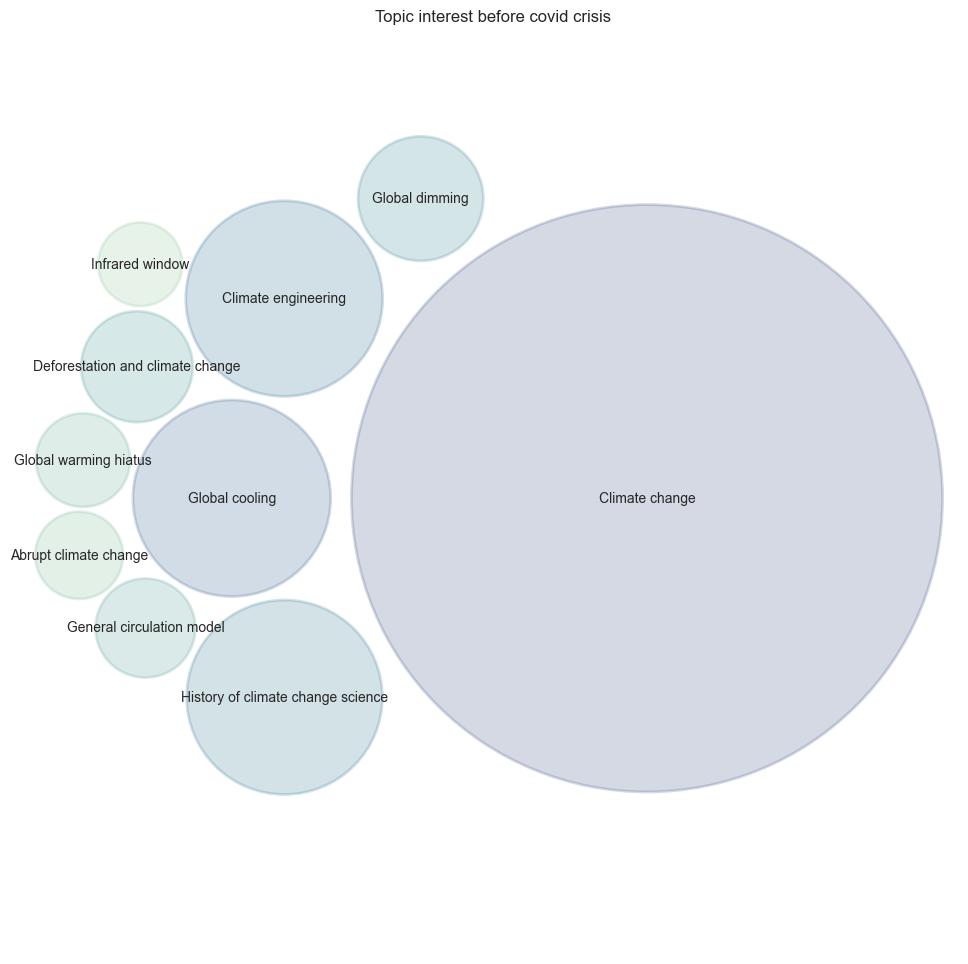

In [123]:
plot_themes_in_bubble(climate_change_cat_baseline,'Topic interest before covid crisis','crest',plot_name = 'topic_bubble_before')

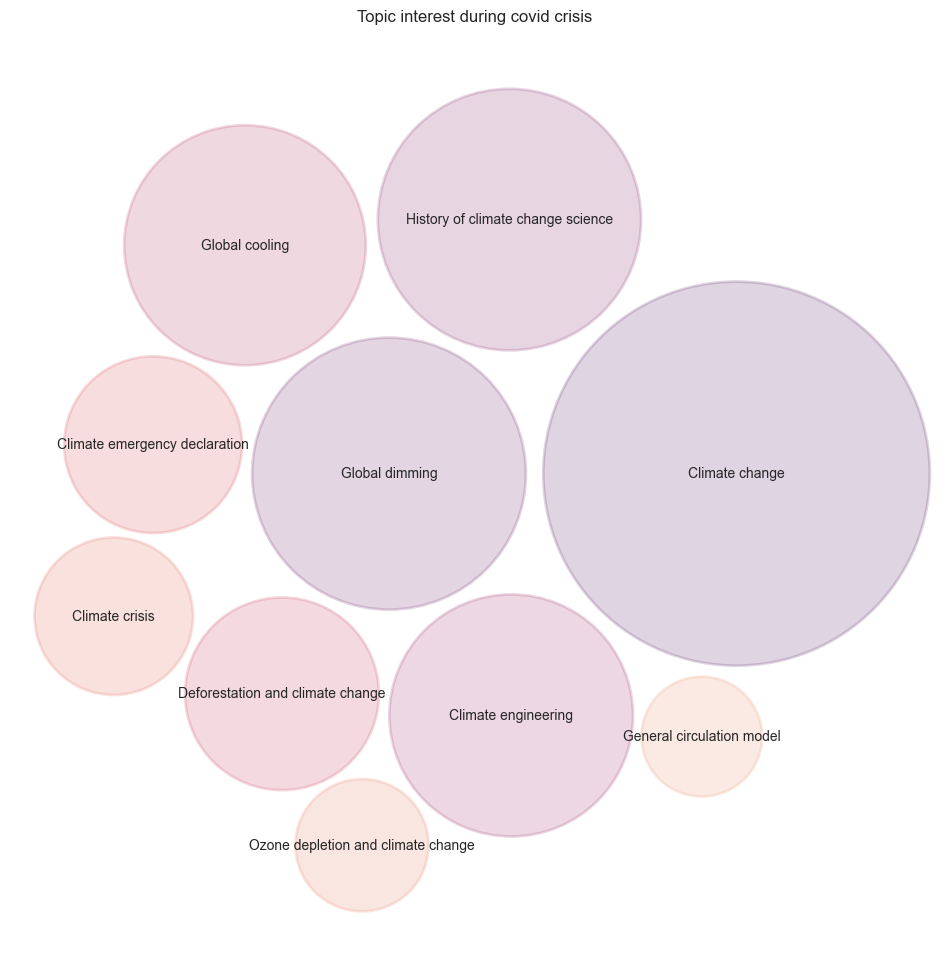

In [124]:
plot_themes_in_bubble(climate_change_cat_covid,'Topic interest during covid crisis','flare',plot_name='topic_bubble_during')

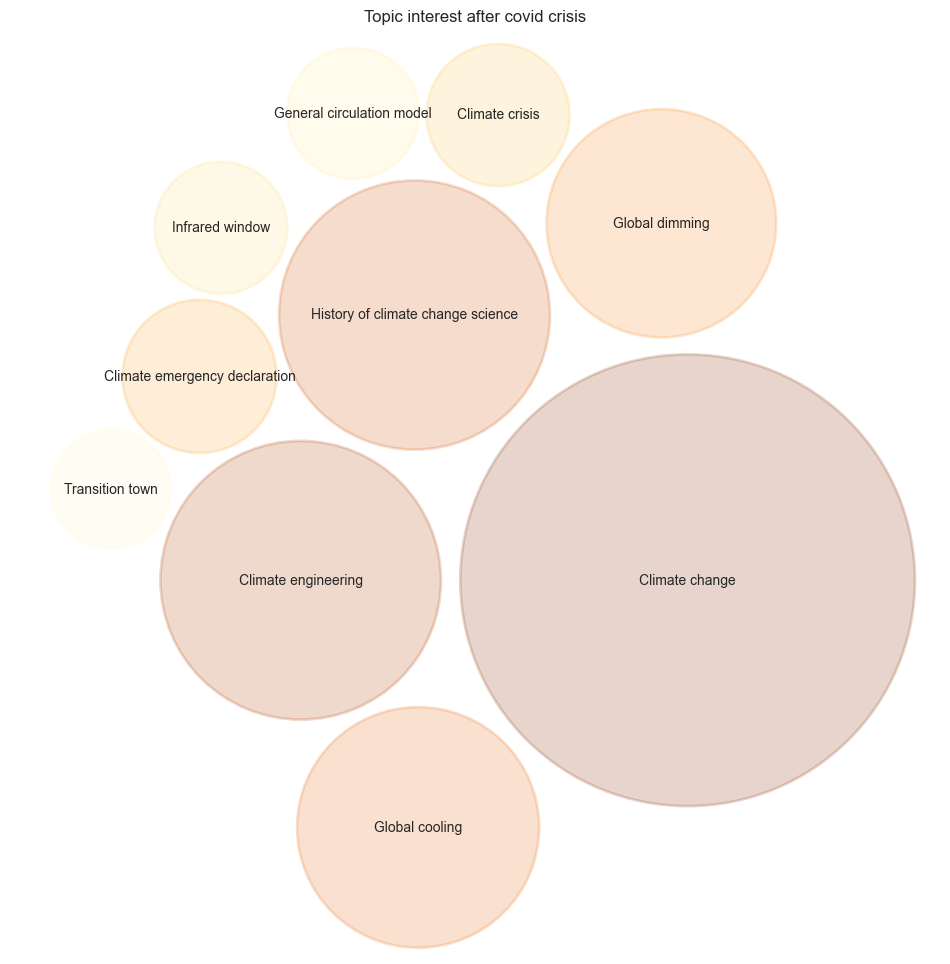

In [125]:
plot_themes_in_bubble(climate_change_cat_summer,'Topic interest after covid crisis','YlOrBr',plot_name = 'topic_bubble_after')

We can now also look at the differentially researched themes

In [126]:
#Function to retrieve the differentially researched themes

def differentially_researched_themes( climate_change_cat_country, country_index, intervention_table, num_articles_graph, graph_bool, numb_returns, plot_name= 'dflt', standardize=False, absolute=False, save = False):
    sns.set_style("dark")
    
    climate_change_cat_covid =  pd.DataFrame(climate_change_cat_country.set_index('Title').loc[:,interventions.loc['1st case',country_index].strftime('%Y-%m-%d'):interventions.loc['Normalcy',country_index].strftime('%Y-%m-%d')].copy().mean(axis=1),columns=['Average']).reset_index().iloc[:-1,:].nlargest(num_articles_graph,'Average')
    article = climate_change_cat_covid['Title'].values
    climate_change_cat_baseline = pd.DataFrame(climate_change_cat_country.set_index('Title').loc[:,'2018-01-01':interventions.loc['1st case',country_index].strftime('%Y-%m-%d')].copy().mean(axis=1),columns=['Average']).reset_index()
    climate_change_cat_baseline = climate_change_cat_baseline[climate_change_cat_baseline.Title.isin(article)]
    climate_change_cat_summer = pd.DataFrame(climate_change_cat_country.set_index('Title').loc[:,interventions.loc['Normalcy',country_index].strftime('%Y-%m-%d'):'2020-09-01'].copy().mean(axis=1),columns=['Average']).reset_index().iloc[:-1,:]
    climate_change_cat_summer = climate_change_cat_summer[climate_change_cat_summer.Title.isin(article)]

    if standardize:
        mean = calculate_mean_pageviews(country_index,interventions.loc['1st case',country_index],interventions.loc['Normalcy',country_index])
        print(mean)
        climate_change_cat_covid.Average = climate_change_cat_covid.Average/mean
        
        mean = calculate_mean_pageviews(country_index, pd.to_datetime('2018-01-01'), interventions.loc['1st case',country_index])
        print(mean)
        climate_change_cat_baseline.Average = climate_change_cat_baseline.Average/mean

        mean = calculate_mean_pageviews(country_index, interventions.loc['Normalcy',country_index], pd.to_datetime('2020-09-01'))
        print(mean)
        climate_change_cat_summer.Average = climate_change_cat_summer.Average/mean

    climate_change_complete =  pd.DataFrame(columns=['Article', 'Baseline', 'Covid', 'Summer', 'BC_diff', 'BS_diff', 'CS_diff'])
    climate_change_complete.Article = climate_change_cat_baseline.Title
    climate_change_complete.Baseline = climate_change_cat_baseline.Average
    climate_change_complete.Covid = climate_change_cat_covid.Average
    climate_change_complete.Summer = climate_change_cat_summer.Average

    #Differences are computed in %
    climate_change_complete.BC_diff = (climate_change_cat_covid.Average - climate_change_cat_baseline.Average)/climate_change_cat_baseline.Average
    climate_change_complete.BS_diff = (climate_change_cat_summer.Average - climate_change_cat_baseline.Average)/climate_change_cat_baseline.Average
    climate_change_complete.CS_diff = (climate_change_cat_summer.Average - climate_change_cat_covid.Average)/climate_change_cat_covid.Average
    
    # remove outliers
    # print(climate_change_complete.BC_diff[climate_change_complete.BC_diff > 15])
    climate_change_complete = climate_change_complete[climate_change_complete.BC_diff < 15] # arbitrary threshold
    
    if graph_bool:
        fig, axes = plt.subplots(1, 3, figsize=(15, 10), sharey=True, sharex=True,
                               gridspec_kw={"hspace": 0.15, "wspace": 0.05})
        
        xlim = (climate_change_complete[['BC_diff','BS_diff','CS_diff']].max()).max()   
        
        for idx, article in enumerate(climate_change_complete['Article']):
            for idy, col in enumerate(["BC_diff", "BS_diff", "CS_diff"]):
                row = dict(climate_change_complete[climate_change_complete.Article == article].iloc[0])
                marker = "."
                axes[idy].scatter([row[col]], [article], color="black", marker=marker, zorder=2)
                axes[idy].plot([0, row[col]], [idx, idx], color= "r" if row[col] < 0 else "g", zorder=1)
                axes[idy].axhline(idx+0.5, lw=0.5, ls=":", color='black', alpha=0.5)
                
            _ = axes[idy].set_yticks(range(0, idx+1))
            _ = axes[idy].set_ylim([-0.5,idx+0.5])
            _ = axes[idy].set_xlim([-2, xlim +1])

        for ax in axes:
            ax.axvline(0, zorder=0, color="black", ls="-", alpha=0.3)

        axes[0].set_title("Baseline vs Covid")
        axes[1].set_title("Baseline vs Summer")
        axes[2].set_title("Covid vs Summer")
        fig.suptitle('Relative difference in topic interest in '+ helper_langs[country_index])
        if standardize:
            fig.supxlabel('Relative change, 1 = 100%')
        else:
            fig.supxlabel('Relative change [%]')
        plt.show()
    
    to_return = climate_change_complete.nlargest(numb_returns, 'BC_diff')
    if absolute:
        idx = climate_change_complete.BC_diff.abs().nlargest(numb_returns).index
        to_return = climate_change_complete.loc[idx,:]
    to_return['Country']=country_index
    if save:
        fig.savefig('img/'+plot_name+'.png', bbox_inches = 'tight')
        
    return to_return

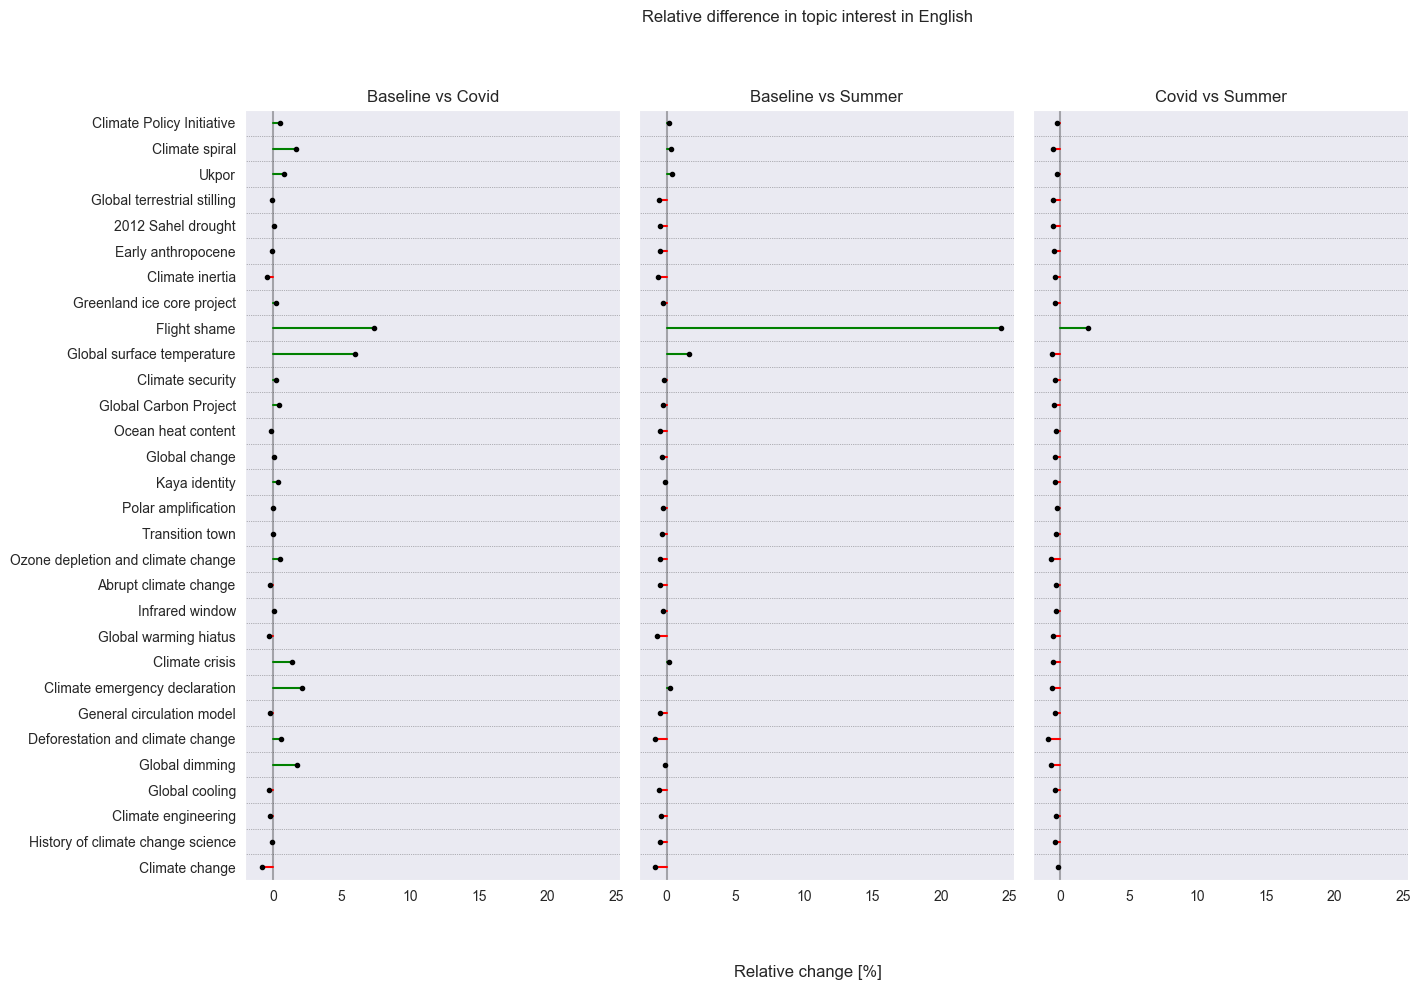

Article   Baseline       Covid     Summer   BC_diff  \
22                   Flight shame   0.685333    5.731707  17.365385  7.363386   
21     Global surface temperature   7.190667   50.398374  18.750000  6.008860   
7   Climate emergency declaration  58.712000  182.097561  74.201923  2.101539   

      BS_diff   CS_diff Country  
22  24.338596  2.029705      en  
21   1.607547 -0.627964      en  
7    0.263829 -0.592516      en

In [127]:
differentially_researched_themes(climate_change_cat_en, 'en', interventions,30, graph_bool = True, numb_returns = 3, save = True, plot_name = 'relative_diff_topics_english')

9063110.0
8390734.025198938
6146650.2


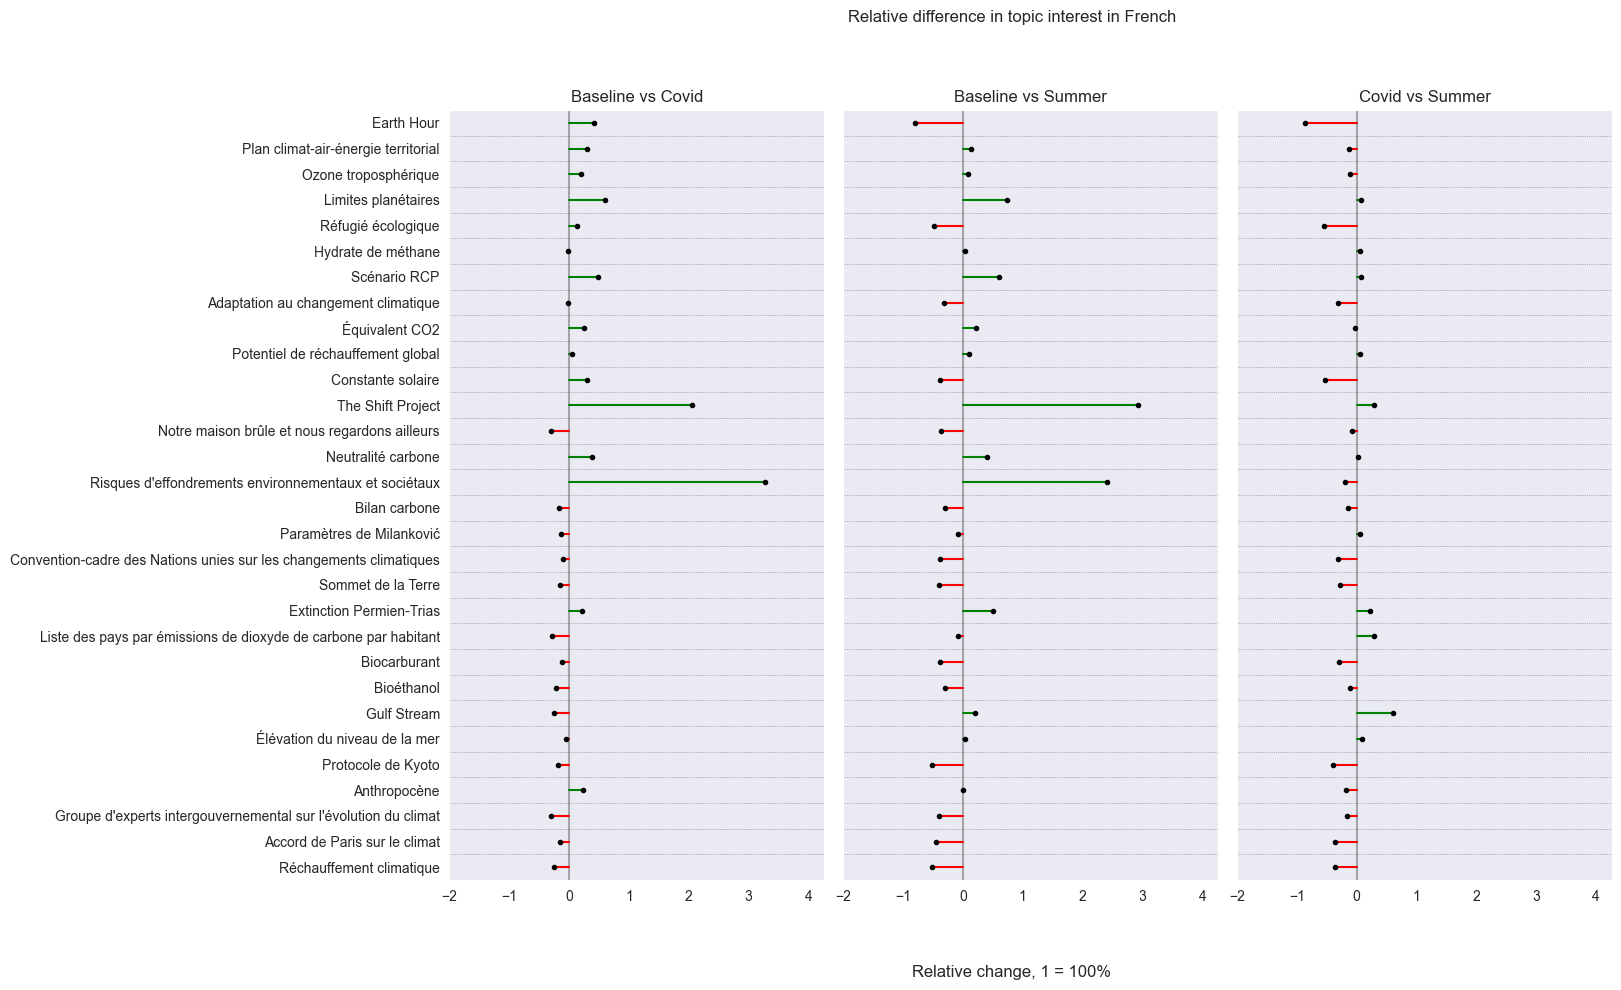

Article  Baseline     Covid  \
15  Risques d'effondrements environnementaux et so...  0.000004  0.000019   
19                                  The Shift Project  0.000004  0.000011   
28                                Limites planétaires  0.000003  0.000005   
25                                       Scénario RCP  0.000003  0.000005   
35                                         Earth Hour  0.000003  0.000004   

          Summer   BC_diff   BS_diff   CS_diff Country  
15  1.531912e-05  3.267098  2.412131 -0.200363      fr  
19  1.417242e-05  2.056694  2.925719  0.284302      fr  
28  4.993541e-06  0.605197  0.730700  0.078186      fr  
25  5.253320e-06  0.488197  0.600179  0.075247      fr  
35  5.877841e-07  0.416688 -0.800746 -0.859352      fr

In [136]:
differentially_researched_themes(climate_change_cat_fr, 'fr', interventions,30, graph_bool=True, numb_returns=5, standardize=True, save = True, plot_name = 'relative_diff_topics_french')

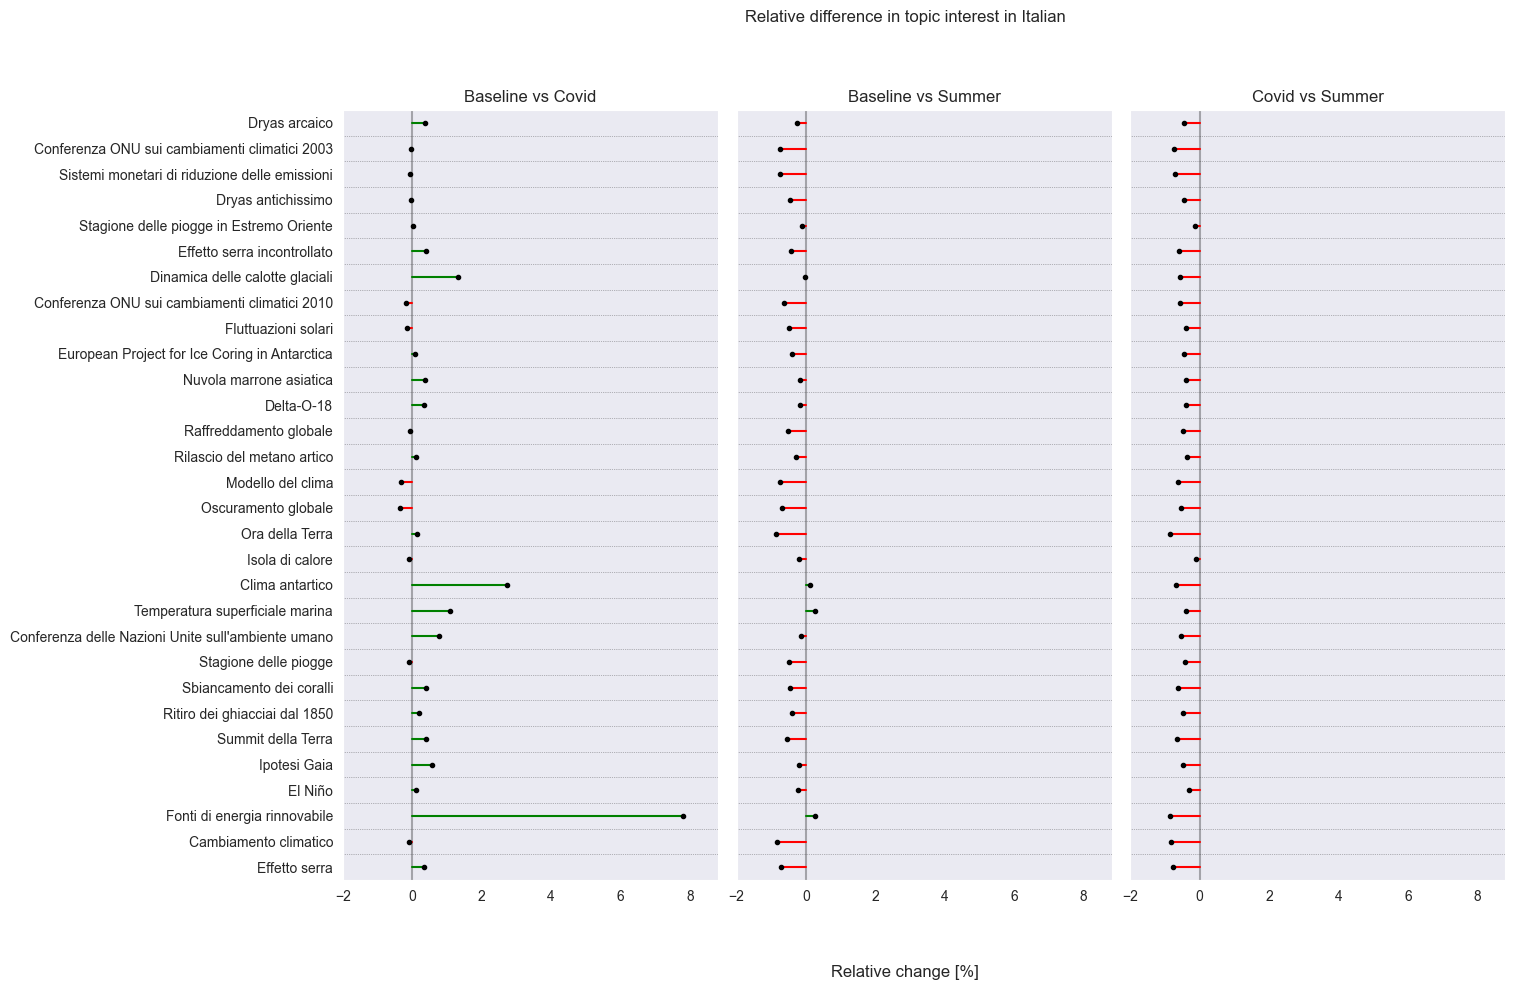

Article   Baseline       Covid      Summer  \
2      Fonti di energia rinnovabile  88.103811  775.952703  110.955882   
11                  Clima antartico  10.557162   39.378378   11.926471   
24  Dinamica delle calotte glaciali   1.809461    4.175676    1.750000   

     BC_diff   BS_diff   CS_diff Country  
2   7.807255  0.259377 -0.857007      it  
11  2.730016  0.129704 -0.697131      it  
24  1.307690 -0.032861 -0.580906      it

In [138]:
differentially_researched_themes(climate_change_cat_it, 'it', interventions,30, True, 3, absolute = True)

427079.17
378677.77763659466
229720.5172413793


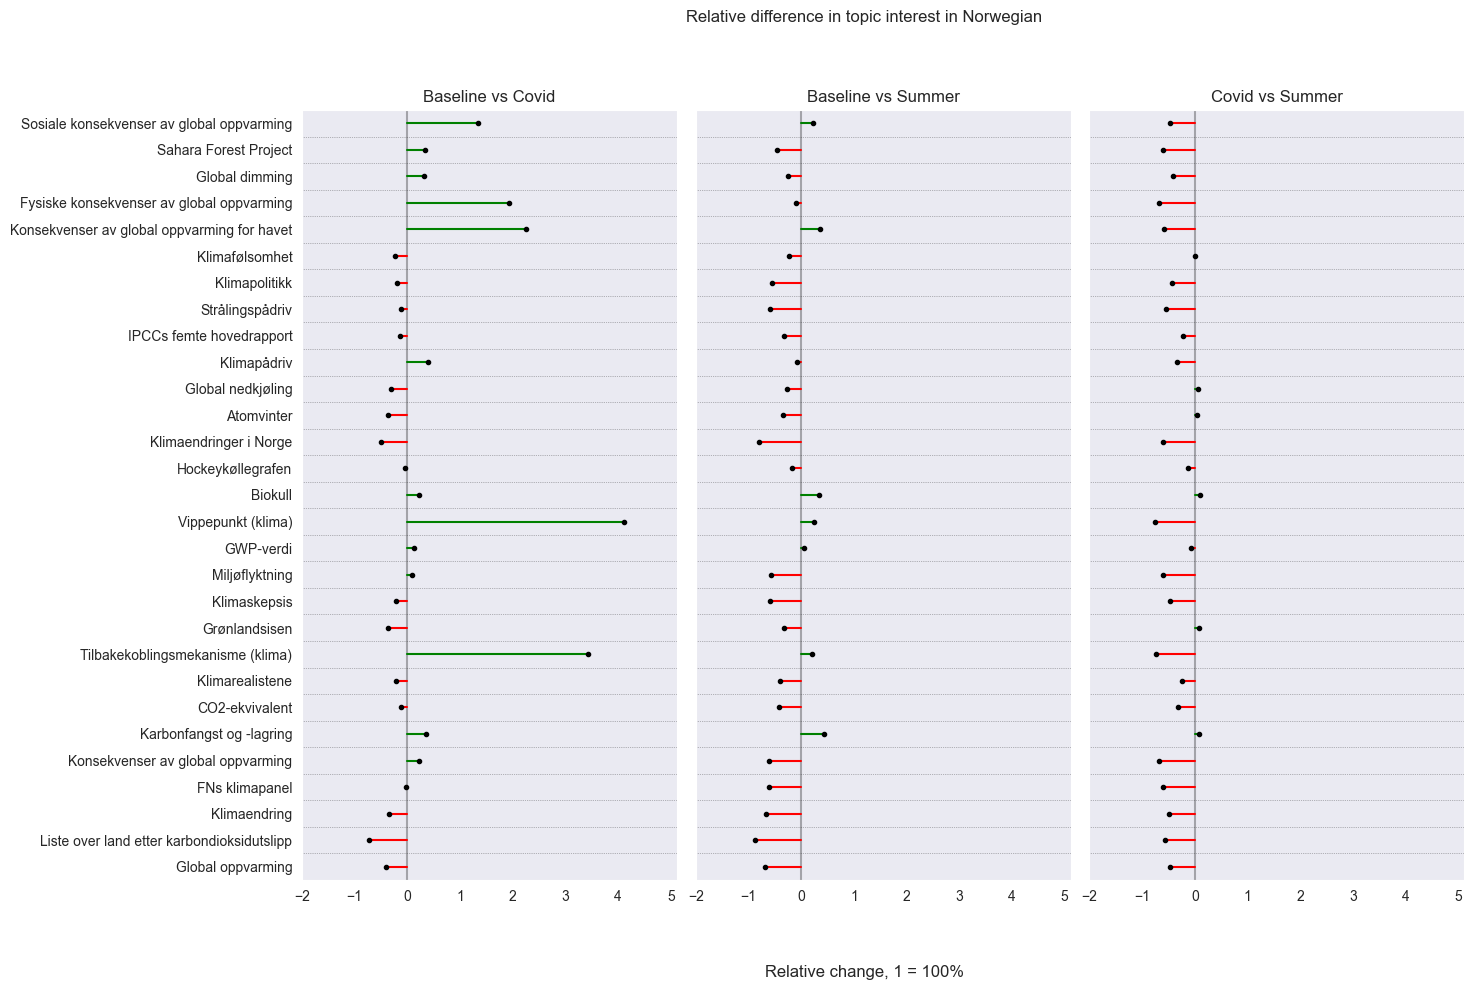

Article  Baseline     Covid    Summer  \
13                           Vippepunkt (klima)  0.000005  0.000024  0.000006   
8              Tilbakekoblingsmekanisme (klima)  0.000008  0.000033  0.000009   
24  Konsekvenser av global oppvarming for havet  0.000002  0.000006  0.000003   

     BC_diff   BS_diff   CS_diff Country  
13  4.115954  0.234958 -0.758607      no  
8   3.421418  0.198545 -0.728923      no  
24  2.253214  0.349026 -0.585325      no

In [139]:
differentially_researched_themes(climate_change_cat_no, 'no', interventions,30, True, 3, standardize = True)

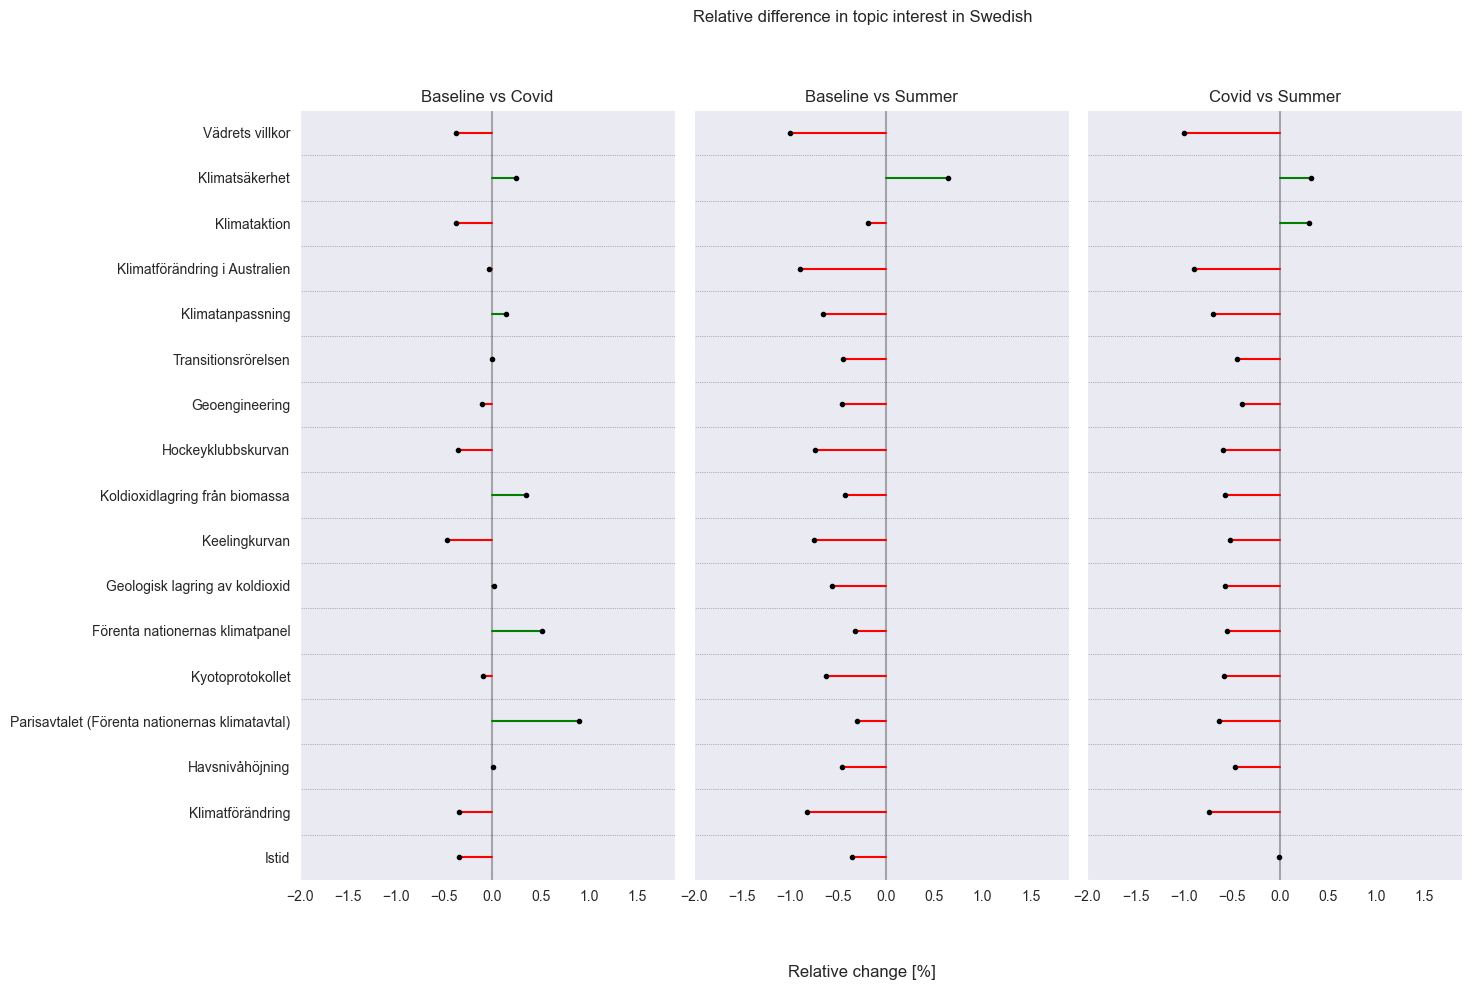

Article   Baseline      Covid  \
3  Parisavtalet (Förenta nationernas klimatavtal)  17.324573  32.818898   
5                 Förenta nationernas klimatpanel  12.672799  19.133858   
7                                   Keelingkurvan  14.176084   7.448819   

      Summer   BC_diff   BS_diff   CS_diff Country  
3  12.022472  0.894355 -0.306045 -0.633672      sv  
5   8.629213  0.509837 -0.319076 -0.549008      sv  
7   3.561798 -0.474550 -0.748746 -0.521831      sv

In [141]:
differentially_researched_themes(climate_change_cat_sw, 'sv', interventions,30, True, 3, absolute = True)

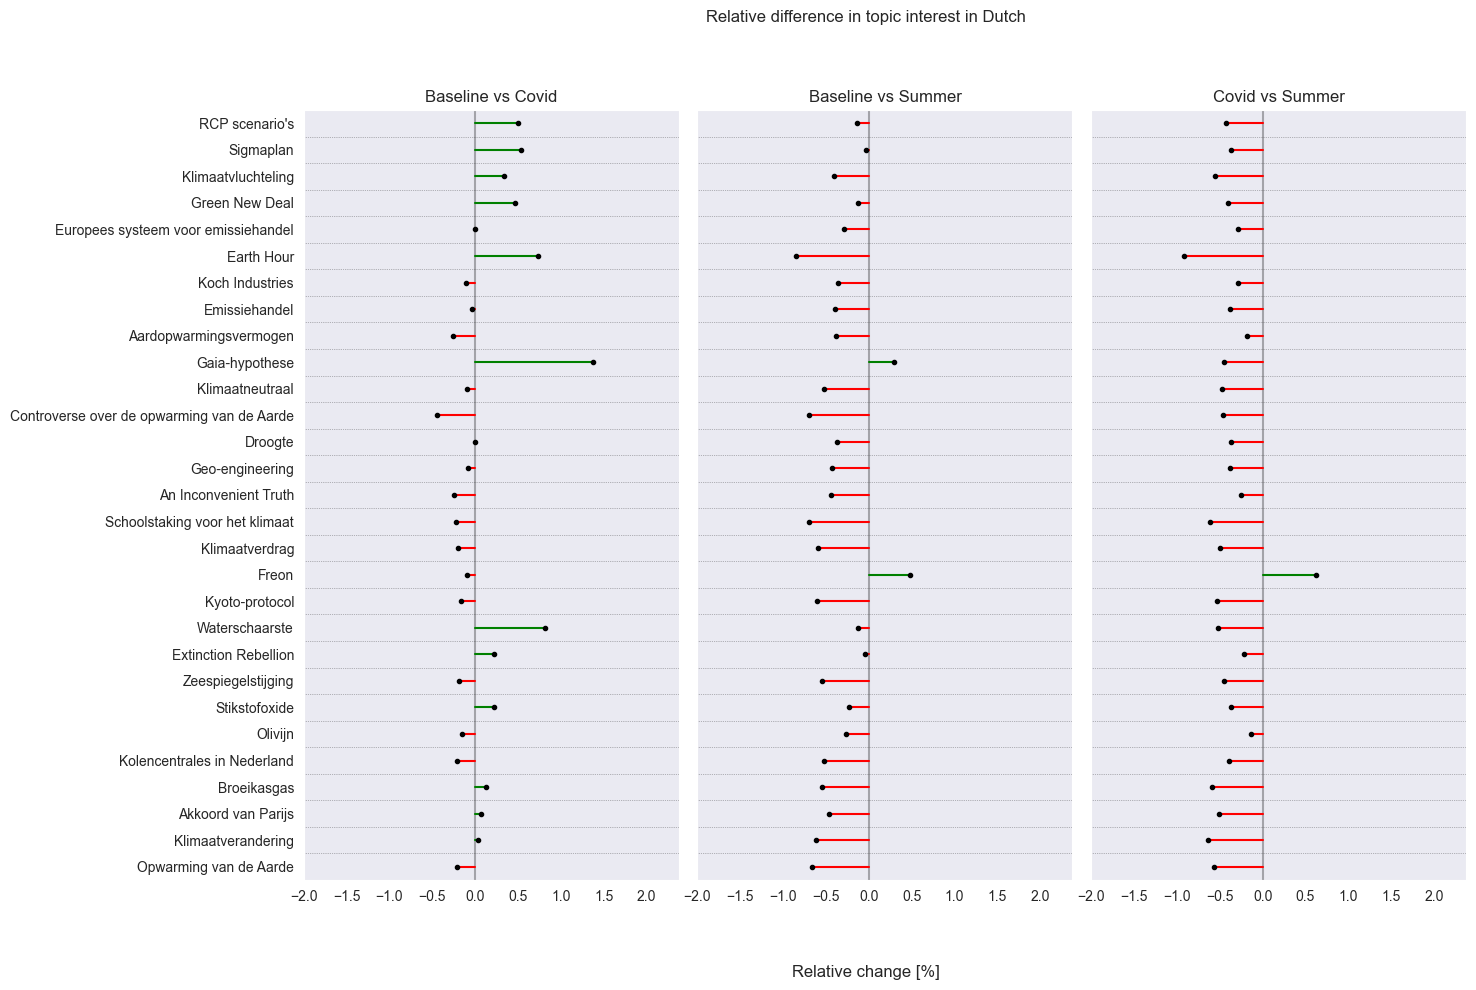

Article   Baseline      Covid     Summer   BC_diff   BS_diff  \
19  Gaia-hypothese  14.071066  33.430108  18.177083  1.375805  0.291806   
9   Waterschaarste  43.543147  78.806452  38.145833  0.809847 -0.123953   
23      Earth Hour  14.007614  24.225806   2.104167  0.729474 -0.849784   

     CS_diff Country  
19 -0.456266      nl  
9  -0.515955      nl  
23 -0.913144      nl

In [142]:
differentially_researched_themes(climate_change_cat_nl, 'nl', interventions,30, True, 3, absolute = True)

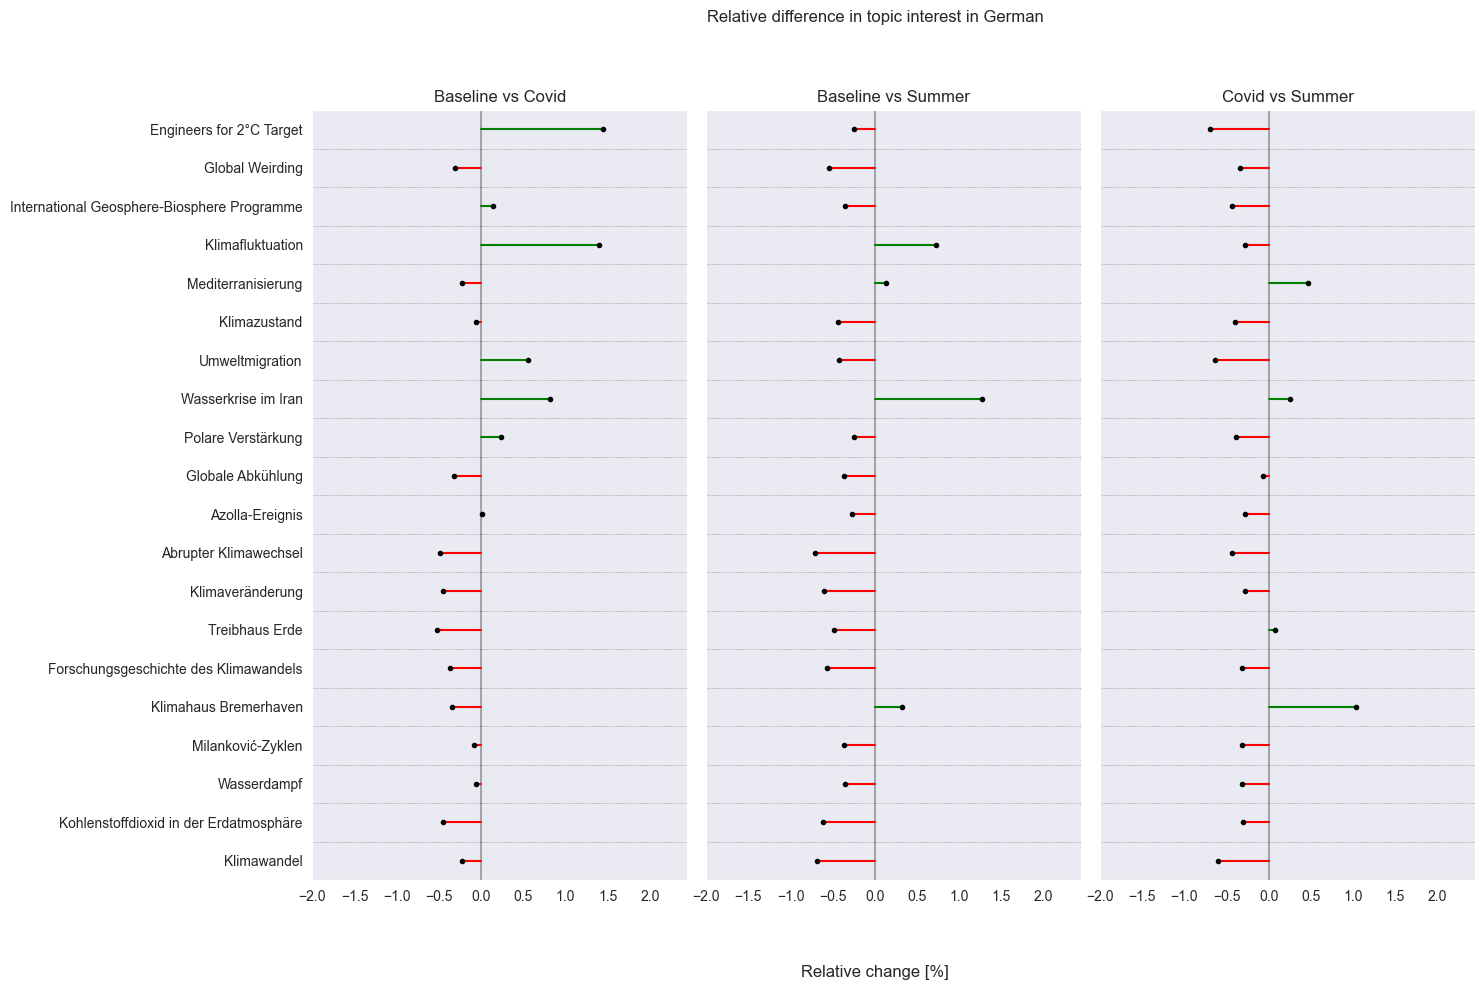

Article   Baseline      Covid     Summer   BC_diff  \
19  Engineers for 2°C Target   0.418758   1.024096   0.314815  1.445555   
16          Klimafluktuation   0.988111   2.373494   1.703704  1.402052   
12       Wasserkrise im Iran   2.385733   4.325301   5.407407  0.812986   
13           Umweltmigration   3.066050   4.771084   1.759259  0.556101   
6             Treibhaus Erde  31.756935  15.277108  16.500000 -0.518936   

     BS_diff   CS_diff Country  
19 -0.248218 -0.692593      de  
16  0.724203 -0.282196      de  
12  1.266560  0.250181      de  
13 -0.426213 -0.631266      de  
6  -0.480428  0.080047      de

In [143]:
differentially_researched_themes(climate_change_cat_de, 'de', interventions,30, True, 5, absolute = True)

In [146]:
#Plot for same dates but before covid

In [147]:
top_changed_articles_fr = differentially_researched_themes(climate_change_cat_fr, 'fr', interventions,30, False, 30)
top_changed_articles_fr_std = differentially_researched_themes(climate_change_cat_fr, 'fr', interventions,30, False, 30, standardize=True)
top_abs_changed_articles_fr = differentially_researched_themes(climate_change_cat_fr, 'fr', interventions,30, False, 30, standardize=True, absolute=True)
appreciation_abs_fr = [-1,0,-1,0,1,0,0,1,1,0,0,0,-1,0,.1,-1,0,0,0,0,0,1,0,.1,0,1,-1,-1,0,0]
appreciation_fr = [-1, 0, -1, 0, 1, 0, 0, 0, 0, -1, -1, 0, -1, -1, 0, 0, -1, 0, 0, 0, 1, 0, 0, 1, 0, -1, 0, -1, 0, -1]
top_changed_articles_fr['Appreciation'] = appreciation_fr
top_changed_articles_fr_std['Appreciation'] = appreciation_fr
top_abs_changed_articles_fr['Appreciation'] = appreciation_abs_fr
top_abs_changed_articles_fr.sample(5)

9063110.0
8390734.025198938
6146650.2
9063110.0
8390734.025198938
6146650.2


Article  Baseline     Covid  \
3                                        Anthropocène  0.000038  0.000047   
28                                Limites planétaires  0.000003  0.000005   
16                                 Neutralité carbone  0.000006  0.000008   
15  Risques d'effondrements environnementaux et so...  0.000004  0.000019   
18      Notre maison brûle et nous regardons ailleurs  0.000008  0.000006   

      Summer   BC_diff   BS_diff   CS_diff Country  Appreciation  
3   0.000039  0.228456  0.008828 -0.178784      fr           0.1  
28  0.000005  0.605197  0.730700  0.078186      fr          -1.0  
16  0.000008  0.388154  0.410116  0.015821      fr           0.0  
15  0.000015  3.267098  2.412131 -0.200363      fr          -1.0  
18  0.000005 -0.306172 -0.364461 -0.084011      fr           0.0

In [148]:

top_changed_articles_sw = differentially_researched_themes(climate_change_cat_sw, 'sv', interventions,30, False, 30)
top_changed_articles_sw_std = differentially_researched_themes(climate_change_cat_sw, 'sv', interventions,30, False, 30, standardize=True)
top_abs_changed_articles_sw = differentially_researched_themes(climate_change_cat_sw, 'sv', interventions,30, False, 30, standardize=True, absolute=True)
# top_changed_articles_sw = top_changed_articles_sw[(top_changed_articles_sw[['BC_diff','BS_diff','CS_diff']].notna()).all(axis=1)]
# top_changed_articles_sw = top_changed_articles_sw[(top_changed_articles_sw[['Baseline','Covid','Summer']]!=0).all(axis=1)]


appreciation_sw = [0, 1, 1, 0, 0, 1, 0, -1, 1, 0, 1, -1, -1, 1, 1, 0, 0]
top_changed_articles_sw['Appreciation'] = appreciation_sw
top_changed_articles_sw_std['Appreciation'] = appreciation_sw
top_abs_changed_articles_sw = top_changed_articles_sw_std # smaller than 30
top_changed_articles_sw.sample(5)

1050648.0
488229.82260183967
638710.8421052631
1050648.0
488229.82260183967
638710.8421052631


Article   Baseline      Covid     Summer   BC_diff   BS_diff  \
18      Klimatsäkerhet   0.170828   0.212598   0.280899  0.244518  0.644339   
2      Havsnivåhöjning  29.718791  30.031496  16.022472  0.010522 -0.460864   
9   Hockeyklubbskurvan   6.926413   4.480315   1.820225 -0.353155 -0.737205   
7        Keelingkurvan  14.176084   7.448819   3.561798 -0.474550 -0.748746   
14        Klimataktion   0.900131   0.559055   0.730337 -0.378918 -0.188633   

     CS_diff Country  Appreciation  
18  0.321265      sv             0  
2  -0.466478      sv             0  
9  -0.593728      sv             1  
7  -0.521831      sv             0  
14  0.306378      sv             1

In [149]:
top_changed_articles_da = differentially_researched_themes(climate_change_cat_da, 'da', interventions,30, False, 30)
top_changed_articles_da_std = differentially_researched_themes(climate_change_cat_da, 'da', interventions,30, False, 30, standardize=True)
top_abs_changed_articles_da = differentially_researched_themes(climate_change_cat_da, 'da', interventions,30, False, 30, standardize=True, absolute=True)
appreciation_da = [0,0,1,0,-1,-1,0,0,0,-1,1,0,0,-1,-1,-1,-1,-1,0,1,0,1] #0,0,0,-1,0
top_changed_articles_da['Appreciation'] = appreciation_da
top_changed_articles_da_std['Appreciation'] = appreciation_da
top_abs_changed_articles_da = top_changed_articles_da_std # smaller than 30
top_changed_articles_da.sample(5)

374441.61
352329.82868020306
240263.8596491228
374441.61
352329.82868020306
240263.8596491228


Article   Baseline  Covid  \
21           Gletsjernes tilbagetrækning siden 1850   0.298223   0.51   
26  Europæisk netværk for vedplanters genressourcer   0.092640   0.09   
6                       Menneskeskabt drivhuseffekt   7.926396   6.57   
0                                     Drivhuseffekt  26.395939  24.55   
12                                       Klimatosse   0.782995   2.28   

      Summer   BC_diff   BS_diff   CS_diff Country  Appreciation  
21  0.415730  0.710128  0.394023 -0.184842      da            -1  
26  0.056180 -0.028493 -0.393566 -0.375780      da             0  
6   1.876404 -0.171124 -0.763271 -0.714398      da            -1  
0   8.415730 -0.069933 -0.681173 -0.657200      da            -1  
12  6.157303  1.911896  6.863785  1.700572      da             0

In [150]:
top_changed_articles_de = differentially_researched_themes(climate_change_cat_de, 'de', interventions,30, False, 30)
top_changed_articles_de_std = differentially_researched_themes(climate_change_cat_de, 'de', interventions,30, False, 30, standardize=True)
top_abs_changed_articles_de = differentially_researched_themes(climate_change_cat_de, 'de', interventions,30, False, 30, standardize=True, absolute=True)
appreciation_de = [1,0,-1,-1,0,0,0,0,0,0,-1,-1,0,-1,0,0,0,-1,-1,0]
top_changed_articles_de['Appreciation'] = appreciation_de
top_changed_articles_de_std['Appreciation'] = appreciation_de
top_abs_changed_articles_de = top_changed_articles_de_std # smaller than 30
top_changed_articles_de.sample(5)

12480319.608433735
12492992.989431968
10107155.272727273
12480319.608433735
12492992.989431968
10107155.272727273


Article    Baseline       Covid  \
18                              Global Weirding    0.889036    0.614458   
0                                   Klimawandel  797.980185  619.530120   
5         Forschungsgeschichte des Klimawandels  111.088507   70.608434   
14                                 Klimazustand    3.324967    3.120482   
17  International Geosphere-Biosphere Programme    1.183620    1.343373   

        Summer   BC_diff   BS_diff   CS_diff Country  Appreciation  
18    0.407407 -0.308849 -0.541742 -0.336964      de             0  
0   247.296296 -0.223627 -0.690097 -0.600832      de            -1  
5    48.351852 -0.364395 -0.564745 -0.315211      de             0  
14    1.888889 -0.061500 -0.431907 -0.394680      de             0  
17    0.759259  0.134971 -0.358528 -0.434811      de             0

In [151]:
top_changed_articles_it = differentially_researched_themes(climate_change_cat_it, 'it', interventions,30, False, 30)
top_changed_articles_it_std = differentially_researched_themes(climate_change_cat_it, 'it', interventions,30, False, 30, standardize=True)
top_abs_changed_articles_it = differentially_researched_themes(climate_change_cat_it, 'it', interventions,30, False, 30, standardize=True, absolute=True)
appreciation_it = [1,0,-1,0,1,-1,1,-1,-1,-1,0,0,-1,-1,1,0,0,0,0,0,1,-1,1,-1,0,-1,0,1,0,-1]
appreciation_abs_it = [1,0,0,0,1,-1,0,-1,1,0,1,-1,-1,-1,0,-1,-1,0,1,-1,0,1,-1,-1,0,0,1,0,-1,0]
top_changed_articles_it['Appreciation'] = appreciation_it
top_changed_articles_it_std['Appreciation'] = appreciation_it
top_abs_changed_articles_it['Appreciation'] = appreciation_abs_it
top_abs_changed_articles_it.sample(5)

5754962.27027027
5013623.1747700395
3545686.8055555555
5754962.27027027
5013623.1747700395
3545686.8055555555


Article      Baseline  \
5                                  Summit della Terra  9.337502e-06   
9   Conferenza delle Nazioni Unite sull'ambiente u...  2.606040e-06   
12                                    Isola di calore  2.731323e-06   
27                                 Dryas antichissimo  2.869973e-07   
19                            Nuvola marrone asiatica  4.447803e-07   

           Covid        Summer   BC_diff   BS_diff   CS_diff Country  \
5   1.145075e-05  6.159099e-06  0.226319 -0.340391 -0.462123      it   
9   4.035295e-06  3.102361e-06  0.548440  0.190450 -0.231194      it   
12  2.177909e-06  3.135541e-06 -0.202618  0.147994  0.439703      it   
27  2.442076e-07  2.198197e-07 -0.149094 -0.234070 -0.099865      it   
19  5.306819e-07  5.267377e-07  0.193133  0.184265 -0.007432      it   

    Appreciation  
5              1  
9              1  
12            -1  
27            -1  
19            -1

In [152]:
top_changed_articles_nl = differentially_researched_themes(climate_change_cat_nl, 'nl', interventions,30, False, 30)
top_changed_articles_nl_std = differentially_researched_themes(climate_change_cat_nl, 'nl', interventions,30, False, 30, standardize=True)
appreciation_nl = [-1,-1,1,0,0,1,-1,0,-1,-1,1,-1,0,-1,0,1,0,0,0,0,1,-1,1,0,-1,-1,0,0,-1] #1
top_changed_articles_nl['Appreciation'] = appreciation_nl
top_changed_articles_nl_std['Appreciation'] = appreciation_nl
top_changed_articles_nl.sample(5)

2136701.9677419355
1889844.9175126904
1619093.34375


Article    Baseline       Covid     Summer  \
25  Europees systeem voor emissiehandel    9.903553    9.870968   7.020833   
23                           Earth Hour   14.007614   24.225806   2.104167   
18                      Klimaatneutraal   20.309645   18.387097   9.645833   
3                           Broeikasgas  104.752538  118.053763  47.781250   
27                       Green New Deal   10.954315   16.064516   9.510417   

     BC_diff   BS_diff   CS_diff Country  Appreciation  
25 -0.003290 -0.291079 -0.288739      nl             0  
23  0.729474 -0.849784 -0.913144      nl             1  
18 -0.094662 -0.525061 -0.475402      nl             0  
3   0.126978 -0.543865 -0.595259      nl            -1  
27  0.466501 -0.131811 -0.407986      nl             1

In [153]:
top_changed_articles_no = differentially_researched_themes(climate_change_cat_no, 'no', interventions,30, False, 30)
top_changed_articles_no_std = differentially_researched_themes(climate_change_cat_no, 'no', interventions,30, False, 30, standardize=True)
appreciation_no = [-1,0,-1,-1,-1,0,1,1,-1,1,-1,0,-1,1,-1,0,0,0,0,-1,0,0,-1,-1,0,0,-1,0,0] #-1
top_changed_articles_no['Appreciation'] = appreciation_no
top_changed_articles_no_std['Appreciation'] = appreciation_no
top_changed_articles_no.sample(5)

427079.17
378677.77763659466
229720.5172413793


Article   Baseline  Covid    Summer  \
5                     Karbonfangst og -lagring   9.714104  14.74  8.477778   
10                                Klimaskepsis   7.724269   6.87  1.933333   
21                             Strålingspådriv   2.010165   1.99  0.488889   
1   Liste over land etter karbondioksidutslipp  77.003812  24.04  5.688889   
16                      Klimaendringer i Norge   2.815756   1.61  0.344444   

     BC_diff   BS_diff   CS_diff Country  Appreciation  
5   0.517381 -0.127271 -0.424845      no             1  
10 -0.110595 -0.749707 -0.718583      no            -1  
21 -0.010032 -0.756792 -0.754327      no             0  
1  -0.687808 -0.926122 -0.763357      no             0  
16 -0.428218 -0.877672 -0.786059      no             0

In [155]:
def plot_appreciation_topic(topic_change_dataframe, country ,country_rating,neg=False): #take country_rating normalized, country as 'France'
    # remove inf values
    topic_change_dataframe = topic_change_dataframe.replace([np.inf, -np.inf], np.nan)
    topic_change_dataframe = topic_change_dataframe.dropna()
    topic_change_dataframe = topic_change_dataframe[topic_change_dataframe.BC_diff < 10]
    idx = 0
    if neg:
        topic_change_dataframe = topic_change_dataframe[topic_change_dataframe.Appreciation == -1]
        idx=-1

    # number of articles per appreciation
    topic_change_count = topic_change_dataframe.groupby('Appreciation').count()

    # print(topic_change_count)

    topic_change_dataframe_mean = topic_change_dataframe.groupby('Appreciation').mean()
    # print(topic_change_dataframe_mean)

    # plot the size of the bubble as the number of articles
    scatter = plt.scatter(x= [country_rating[country]]*len(topic_change_dataframe_mean),y =topic_change_dataframe_mean['BC_diff'], c = topic_change_dataframe_mean.index, cmap = 'RdYlGn', s = topic_change_count.Article*100, alpha = 0.5)
    plt.xlabel('Impact factor')
    plt.ylabel('Baseline vs covid change in pageviews')

    plt.legend(handles=scatter.legend_elements()[0], labels=['Decreased', 'Neutral','Increased'])

    plt.text(country_rating[country], topic_change_dataframe_mean.BC_diff[idx], country, fontsize=12)
    # plt.ylim(-3,10)

C:\Users\arthu\AppData\Local\Temp\ipykernel_25588\3335920469.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  topic_change_dataframe_mean = topic_change_dataframe.groupby('Appreciation').mean()
C:\Users\arthu\AppData\Local\Temp\ipykernel_25588\3335920469.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  topic_change_dataframe_mean = topic_change_dataframe.groupby('Appreciation').mean()
C:\Users\arthu\AppData\Local\Temp\ipykernel_25588\3335920469.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Eith

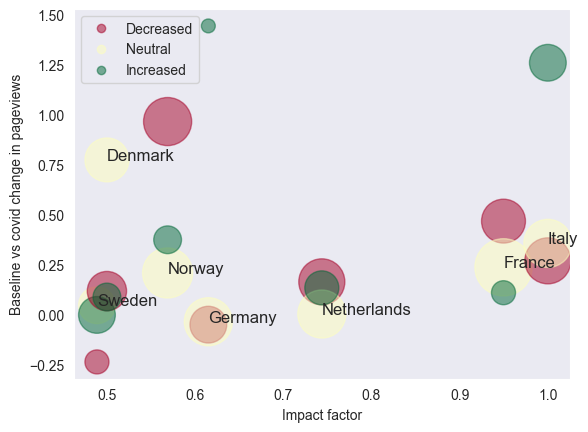

In [156]:
plot_appreciation_topic(top_changed_articles_fr, 'France', country_rating_normalized)
plot_appreciation_topic(top_changed_articles_sw, 'Sweden', country_rating_normalized)
plot_appreciation_topic(top_changed_articles_da, 'Denmark', country_rating_normalized)
plot_appreciation_topic(top_changed_articles_de, 'Germany', country_rating_normalized)
plot_appreciation_topic(top_changed_articles_it, 'Italy', country_rating_normalized)
plot_appreciation_topic(top_changed_articles_nl, 'Netherlands', country_rating_normalized)
plot_appreciation_topic(top_changed_articles_no, 'Norway', country_rating_normalized)

C:\Users\arthu\AppData\Local\Temp\ipykernel_25588\3335920469.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  topic_change_dataframe_mean = topic_change_dataframe.groupby('Appreciation').mean()
C:\Users\arthu\AppData\Local\Temp\ipykernel_25588\3335920469.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  topic_change_dataframe_mean = topic_change_dataframe.groupby('Appreciation').mean()
C:\Users\arthu\AppData\Local\Temp\ipykernel_25588\3335920469.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Eith

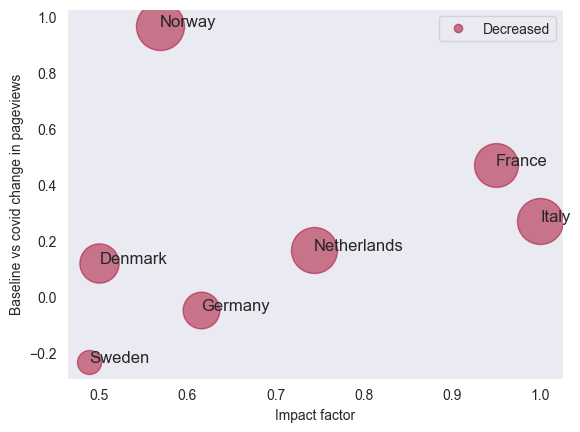

In [157]:
plot_appreciation_topic(top_changed_articles_fr, 'France', country_rating_normalized, neg=True)
plot_appreciation_topic(top_changed_articles_sw, 'Sweden', country_rating_normalized, neg=True)
plot_appreciation_topic(top_changed_articles_da, 'Denmark', country_rating_normalized, neg=True)
plot_appreciation_topic(top_changed_articles_de, 'Germany', country_rating_normalized, neg=True)
plot_appreciation_topic(top_changed_articles_it, 'Italy', country_rating_normalized, neg=True)
plot_appreciation_topic(top_changed_articles_nl, 'Netherlands', country_rating_normalized, neg=True)
plot_appreciation_topic(top_changed_articles_no, 'Norway', country_rating_normalized, neg=True)

C:\Users\arthu\AppData\Local\Temp\ipykernel_25588\3335920469.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  topic_change_dataframe_mean = topic_change_dataframe.groupby('Appreciation').mean()
C:\Users\arthu\AppData\Local\Temp\ipykernel_25588\3335920469.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  topic_change_dataframe_mean = topic_change_dataframe.groupby('Appreciation').mean()
C:\Users\arthu\AppData\Local\Temp\ipykernel_25588\3335920469.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Eith

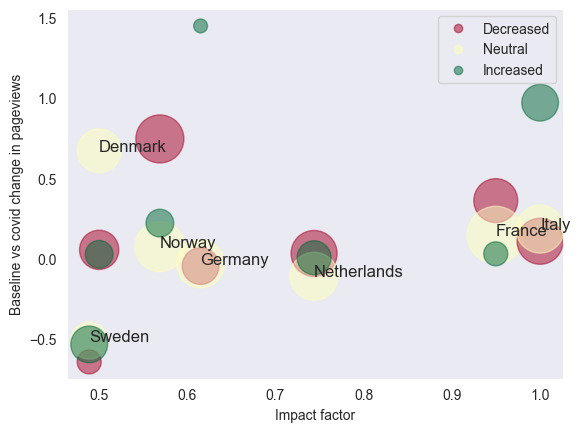

In [158]:
plot_appreciation_topic(top_changed_articles_fr_std, 'France', country_rating_normalized)
plot_appreciation_topic(top_changed_articles_sw_std, 'Sweden', country_rating_normalized)
plot_appreciation_topic(top_changed_articles_da_std, 'Denmark', country_rating_normalized)
plot_appreciation_topic(top_changed_articles_de_std, 'Germany', country_rating_normalized)
plot_appreciation_topic(top_changed_articles_it_std, 'Italy', country_rating_normalized)
plot_appreciation_topic(top_changed_articles_nl_std, 'Netherlands', country_rating_normalized)
plot_appreciation_topic(top_changed_articles_no_std, 'Norway', country_rating_normalized)

C:\Users\arthu\AppData\Local\Temp\ipykernel_25588\3335920469.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  topic_change_dataframe_mean = topic_change_dataframe.groupby('Appreciation').mean()
C:\Users\arthu\AppData\Local\Temp\ipykernel_25588\3335920469.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  topic_change_dataframe_mean = topic_change_dataframe.groupby('Appreciation').mean()
C:\Users\arthu\AppData\Local\Temp\ipykernel_25588\3335920469.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Eith

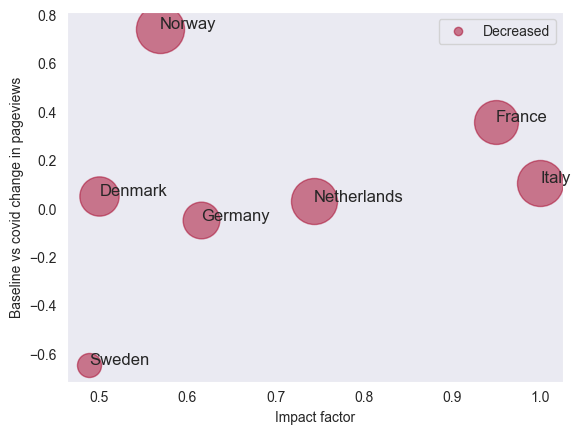

In [159]:
plot_appreciation_topic(top_changed_articles_fr_std, 'France', country_rating_normalized, neg=True)
plot_appreciation_topic(top_changed_articles_sw_std, 'Sweden', country_rating_normalized, neg=True)
plot_appreciation_topic(top_changed_articles_da_std, 'Denmark', country_rating_normalized, neg=True)
plot_appreciation_topic(top_changed_articles_de_std, 'Germany', country_rating_normalized, neg=True)
plot_appreciation_topic(top_changed_articles_it_std, 'Italy', country_rating_normalized, neg=True)
plot_appreciation_topic(top_changed_articles_nl_std, 'Netherlands', country_rating_normalized, neg=True)
plot_appreciation_topic(top_changed_articles_no_std, 'Norway', country_rating_normalized, neg=True)

C:\Users\arthu\AppData\Local\Temp\ipykernel_25588\3335920469.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  topic_change_dataframe_mean = topic_change_dataframe.groupby('Appreciation').mean()
C:\Users\arthu\AppData\Local\Temp\ipykernel_25588\3335920469.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  topic_change_dataframe_mean = topic_change_dataframe.groupby('Appreciation').mean()
C:\Users\arthu\AppData\Local\Temp\ipykernel_25588\3335920469.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Eith

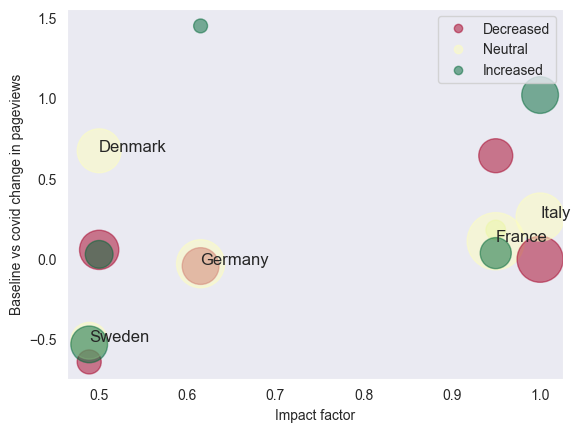

In [160]:
plot_appreciation_topic(top_abs_changed_articles_fr, 'France', country_rating_normalized)
plot_appreciation_topic(top_abs_changed_articles_sw, 'Sweden', country_rating_normalized)
plot_appreciation_topic(top_abs_changed_articles_da, 'Denmark', country_rating_normalized)
plot_appreciation_topic(top_abs_changed_articles_de, 'Germany', country_rating_normalized)
plot_appreciation_topic(top_abs_changed_articles_it, 'Italy', country_rating_normalized)